In [1]:
%matplotlib inline
DEFAULT_FIGSIZE = (16, 12)

import os
import pickle
import itertools
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon': True})
import pandas as pd

sys.path.append('..')
from antlia.record import Record, load_file
from antlia.dtype import load_converted_record
from antlia import plot_braking as braking
from antlia import dtc
from antlia.plotdf import plotjoint

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE
mpl.rcParams['legend.facecolor'] = 'white'

colors = sns.color_palette('Paired', 10)

In [2]:
with open('../config.p', 'rb') as f:
        bicycle_calibration = pickle.load(f)

bicycle_record_files = [
    '2018-04-23_12-30-38.csv',
    '2018-04-23_13-13-36.csv',
    '2018-04-23_14-22-58.csv',
    '2018-04-23_15-27-48.csv',
    '2018-04-23_16-32-27.csv',
    '2018-04-23_17-14-00.csv',
    '2018-04-25_09-27-24.csv',
    '2018-04-25_10-20-28.csv',
    '2018-04-25_11-34-04.csv',
    '2018-04-25_12-41-48.csv',
    '2018-04-25_14-14-57.csv',
    '2018-04-25_14-49-39.csv',
    '2018-04-25_16-15-57.csv',
    '2018-04-25_17-23-04.csv',
    '2018-04-26_11-19-31.csv',
    '2018-04-26_14-50-53.csv',
    '2018-04-27_14-59-52.csv'
]

lidar_record_files = [
    '2018-04-23-12-17-37_0.pkl.gz',
    '2018-04-23-13-01-00_0.pkl.gz',
    '2018-04-23-14-10-33_0.pkl.gz',
    '2018-04-23-15-15-14_0.pkl.gz',
    '2018-04-23-16-19-35_0.pkl.gz',
    '2018-04-23-17-01-24_0.pkl.gz',
    '2018-04-25-09-15-00_0.pkl.gz',
    '2018-04-25-10-07-31_0.pkl.gz',
    '2018-04-25-11-21-29_0.pkl.gz',
    '2018-04-25-12-29-06_0.pkl.gz',
    '2018-04-25-14-02-15_0.pkl.gz',
    '2018-04-25-14-36-55_0.pkl.gz',
    '2018-04-25-16-03-24_0.pkl.gz',
    '2018-04-25-17-10-07_0.pkl.gz',
    '2018-04-26-11-07-38_0.pkl.gz',
    '2018-04-26-14-38-03_0.pkl.gz',
    '2018-04-27-14-47-07_0.pkl.gz',
    '2018-04-27-15-39-56_0.pkl.gz'
]

records = []
data_dir = '../../data/comfort'
i = 0
for file1, file2 in zip(bicycle_record_files, lidar_record_files):
    r1 = load_file(os.path.join(data_dir, file1), bicycle_calibration['convbike'])
    r2 = load_converted_record(os.path.join(data_dir, file2))
    r = Record(r2, r1)
    records.append(r)
    print('loaded record from files: {}, {}'.format(file1, file2))
    i += 1
    if i >= 8:
        break

loaded record from files: 2018-04-23_12-30-38.csv, 2018-04-23-12-17-37_0.pkl.gz
loaded record from files: 2018-04-23_13-13-36.csv, 2018-04-23-13-01-00_0.pkl.gz
loaded record from files: 2018-04-23_14-22-58.csv, 2018-04-23-14-10-33_0.pkl.gz
loaded record from files: 2018-04-23_15-27-48.csv, 2018-04-23-15-15-14_0.pkl.gz
loaded record from files: 2018-04-23_16-32-27.csv, 2018-04-23-16-19-35_0.pkl.gz
loaded record from files: 2018-04-23_17-14-00.csv, 2018-04-23-17-01-24_0.pkl.gz
loaded record from files: 2018-04-25_09-27-24.csv, 2018-04-25-09-15-00_0.pkl.gz
loaded record from files: 2018-04-25_10-20-28.csv, 2018-04-25-10-07-31_0.pkl.gz


In [63]:
# notes on missing syncs and repeated trials
missing_sync = [
   [680], None, None, None, None,
   None, None, None, None, None,
   None, None, None, None, None,
   None, None
]

trial_mask = [
   None, None, 0, None, None,
   0, None, None, 9, None,
   None, 11, 8, 9, None,
   None, None
]

#assert len(missing_sync) == len(records)

for i, (r, ms, tm) in enumerate(zip(records, missing_sync, trial_mask)):
    print('calculating trials for cyclist', i)
    
    try:
        r.sync()
        r._calculate_trials2(missing_sync=ms, trial_mask=tm)
    except (AssertionError, ValueError) as e:
        print('unable to calculate trials for cyclist', i)
        print(e)

calculating trials for cyclist 0
calculating trials for cyclist 1


../antlia/trial2.py:1049: UserWarning: Unable to detect cyclist exiting or braking for event ending at t = 689.011 seconds
  


calculating trials for cyclist 2
calculating trials for cyclist 3
calculating trials for cyclist 4
calculating trials for cyclist 5
calculating trials for cyclist 6
calculating trials for cyclist 7


In [64]:
%matplotlib inline

plt.close('all')

for i, r in enumerate(records):
    for j, tr in enumerate(r.trials):
        pattern = None
        if (i, j) == (6, 11):
            # hardcode pattern for (6, 11)
            pattern=(0, -1, 0, 1, 0, -1, 0, 1, 0)
            
        try:
            tr.event._identify_steer_slice(pattern=pattern)
            print('{}-{}: start time: {}'.format(i, j, tr.event.steer_slice.start))
        except TypeError as e:
            if e.args == ('Incorrect EventType',):
                pass
            else:
                raise e
        #else:
        #    tr.event.plot_steer_identification(figsize=(12, 24))
        #    plt.show()

/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/scipy/signal/windows.py:1379: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "
../antlia/trial2.py:546: UserWarning: First frequency minimum exceeds 0.4 and has been replaced with 0.1
  warnings.warn(msg)


0-3: start time: 733
0-4: start time: 529
0-5: start time: 675
0-9: start time: 547
0-10: start time: 485
0-11: start time: 920
0-15: start time: 430
0-16: start time: 584
0-17: start time: 910
1-0: start time: 992
1-1: start time: 463
1-2: start time: 579
1-6: start time: 610
1-7: start time: 350
1-8: start time: 857
1-12: start time: 293
1-13: start time: 674
1-14: start time: 818
2-3: start time: 652
2-4: start time: 490
2-5: start time: 993
2-9: start time: 533
2-10: start time: 649
2-11: start time: 1066
2-15: start time: 963
2-16: start time: 442
2-17: start time: 761
3-0: start time: 760
3-1: start time: 484
3-2: start time: 1026
3-6: start time: 378
3-7: start time: 669
3-8: start time: 770
3-12: start time: 884
3-13: start time: 474
3-14: start time: 760
4-3: start time: 512
4-4: start time: 686
4-5: start time: 932
4-9: start time: 974
4-10: start time: 535
4-11: start time: 764
4-15: start time: 698
4-16: start time: 390
4-17: start time: 950
5-0: start time: 301
5-1: start 

/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


rider 0, trial 3
{'mean': '3.239', 'amplitude': '-3.312', 'frequency': '0.044', 'phase': '-745.049'}


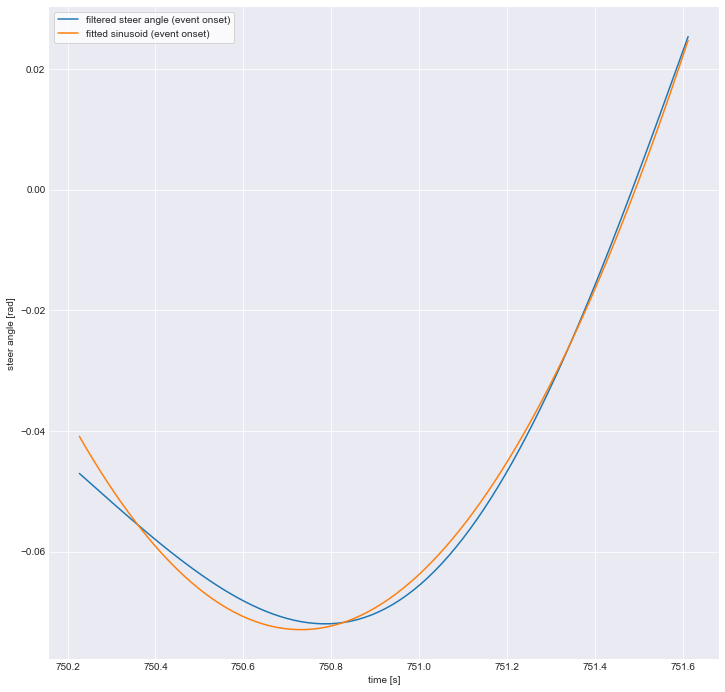

rider 0, trial 4
{'mean': '0.029', 'amplitude': '-0.115', 'frequency': '0.468', 'phase': '-838.654'}


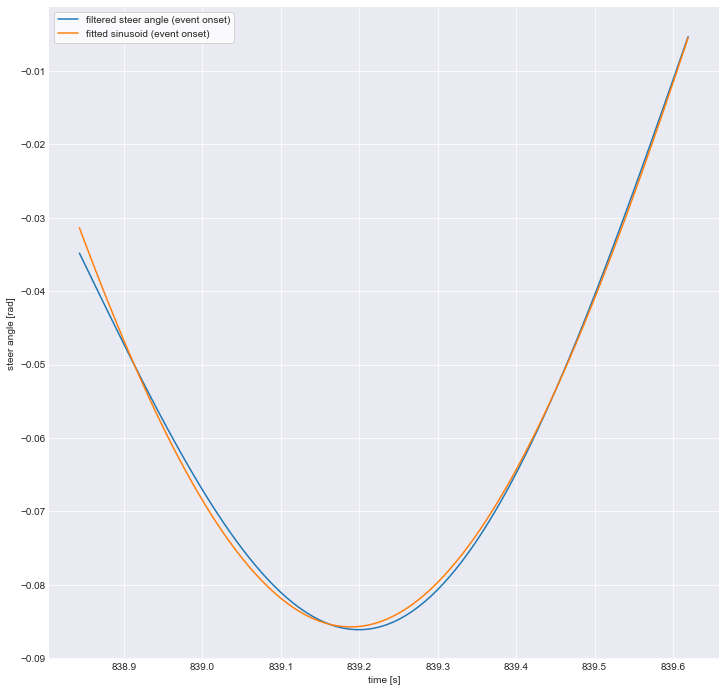

rider 0, trial 5
{'mean': '1.227', 'amplitude': '-1.277', 'frequency': '0.076', 'phase': '-922.222'}


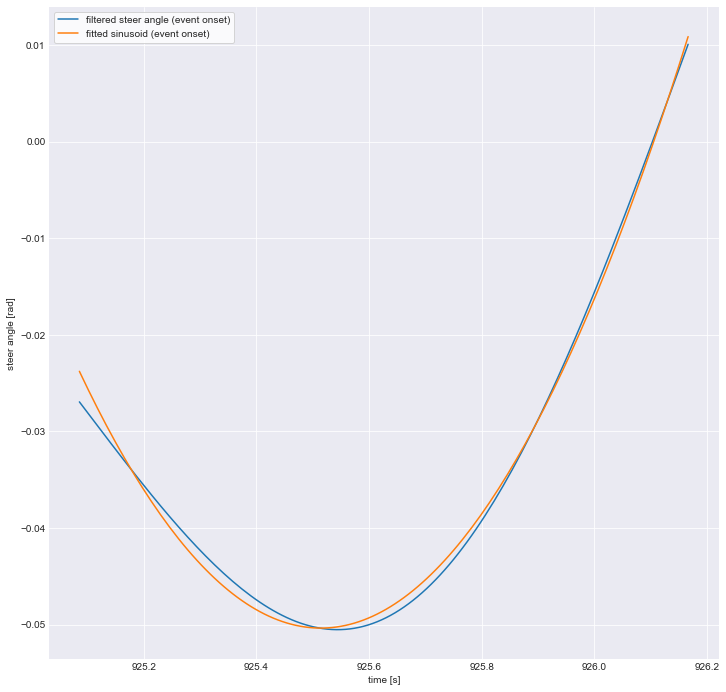

rider 0, trial 9
{'mean': '3.943', 'amplitude': '-3.979', 'frequency': '0.027', 'phase': '-1247.899'}


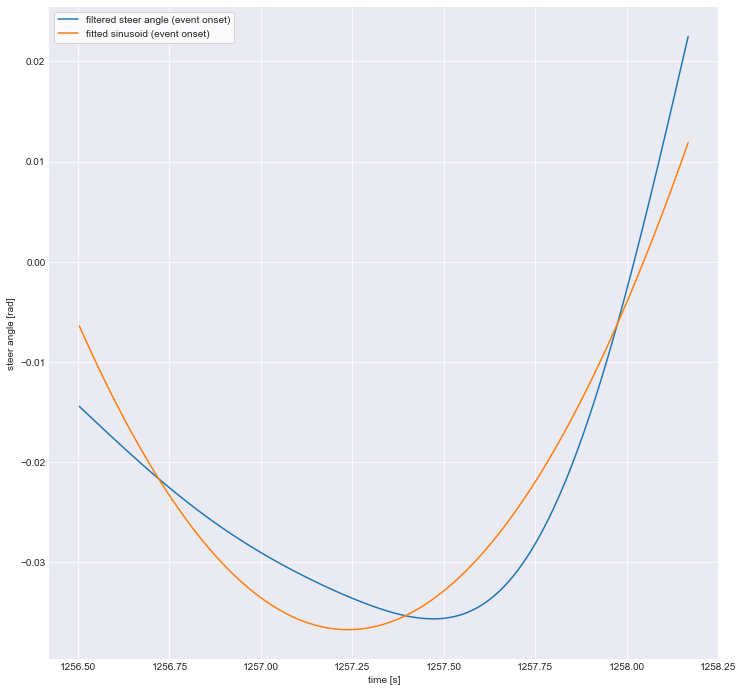

rider 0, trial 10
{'mean': '0.958', 'amplitude': '-0.993', 'frequency': '0.070', 'phase': '-1336.252'}


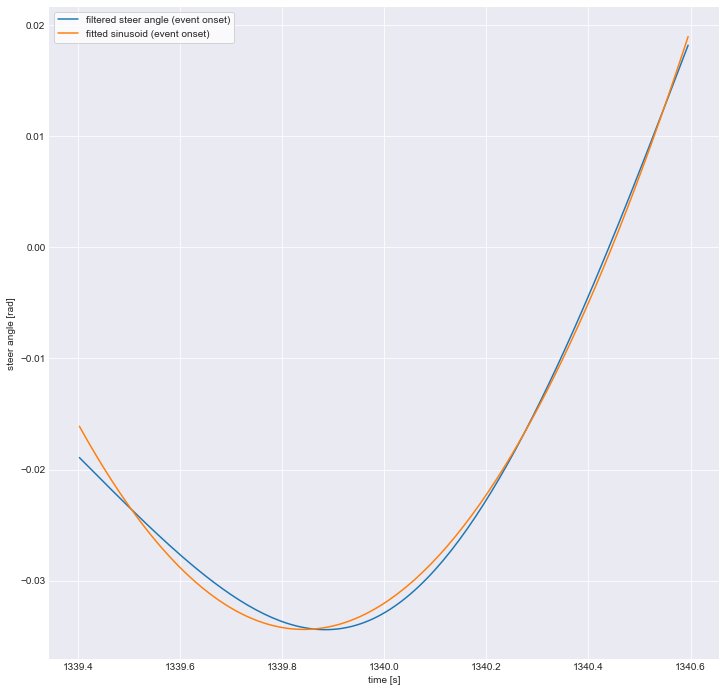

rider 0, trial 11
{'mean': '2.073', 'amplitude': '-2.152', 'frequency': '0.056', 'phase': '-1425.986'}


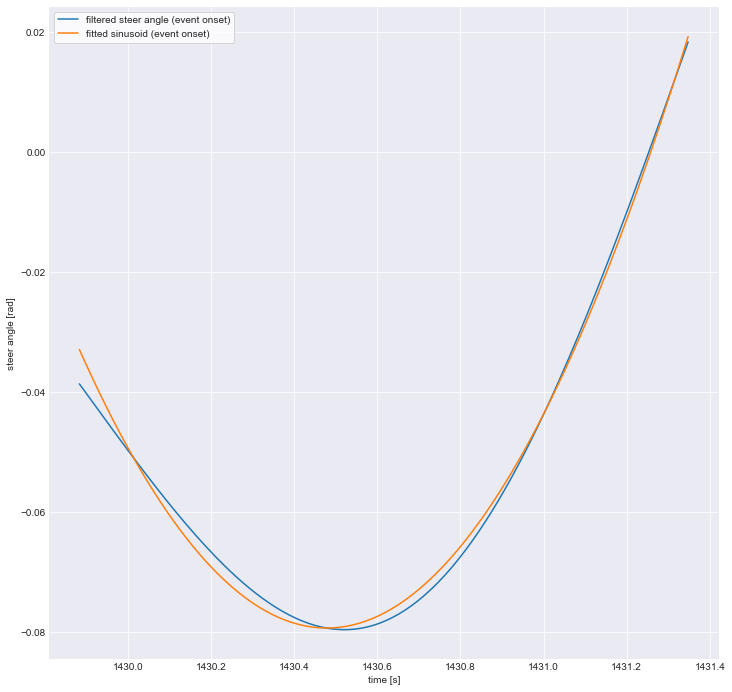

rider 0, trial 15
{'mean': '0.115', 'amplitude': '-0.167', 'frequency': '0.247', 'phase': '-1809.425'}


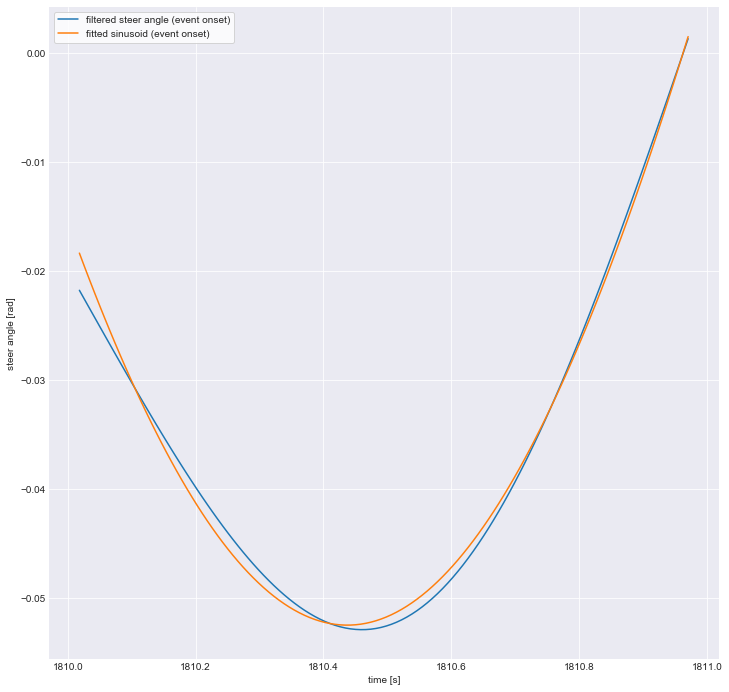

rider 0, trial 16
{'mean': '3.310', 'amplitude': '-3.345', 'frequency': '0.027', 'phase': '-1895.366'}


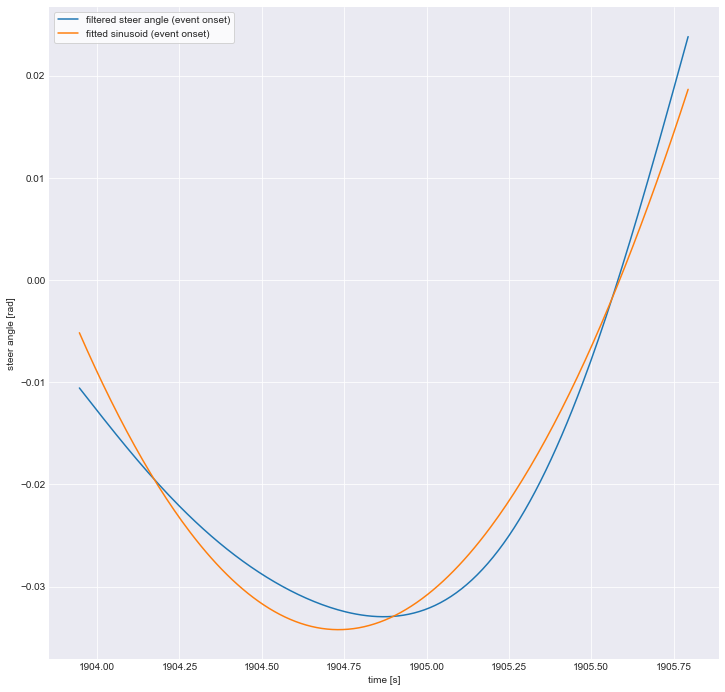

rider 0, trial 17
{'mean': '2.463', 'amplitude': '-2.525', 'frequency': '0.042', 'phase': '-1997.854'}


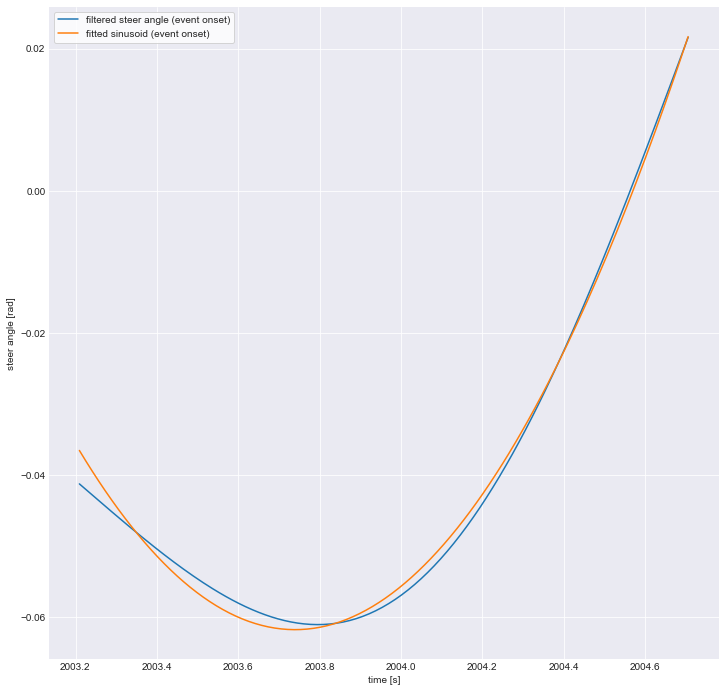

rider 1, trial 0
{'mean': '0.059', 'amplitude': '-0.208', 'frequency': '0.294', 'phase': '-111.000'}


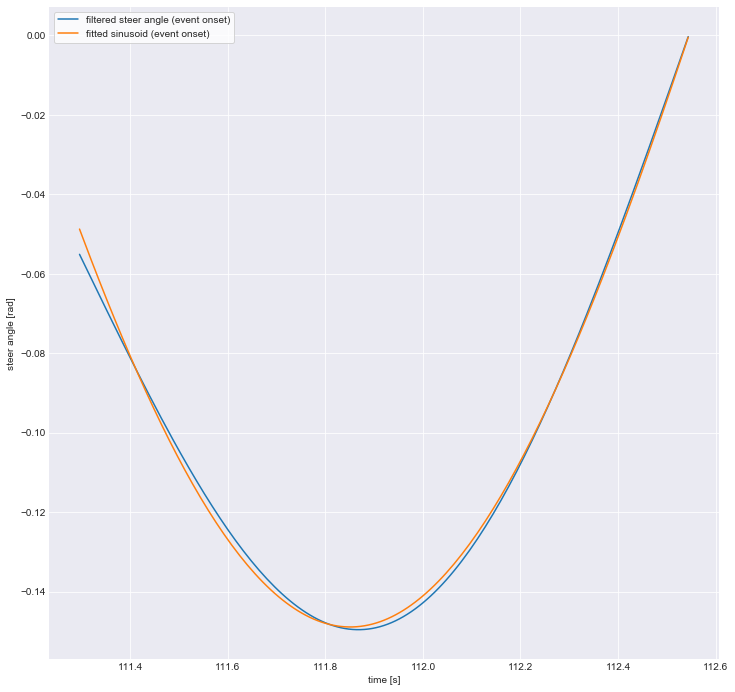

rider 1, trial 1
{'mean': '0.610', 'amplitude': '-0.649', 'frequency': '0.090', 'phase': '-195.599'}


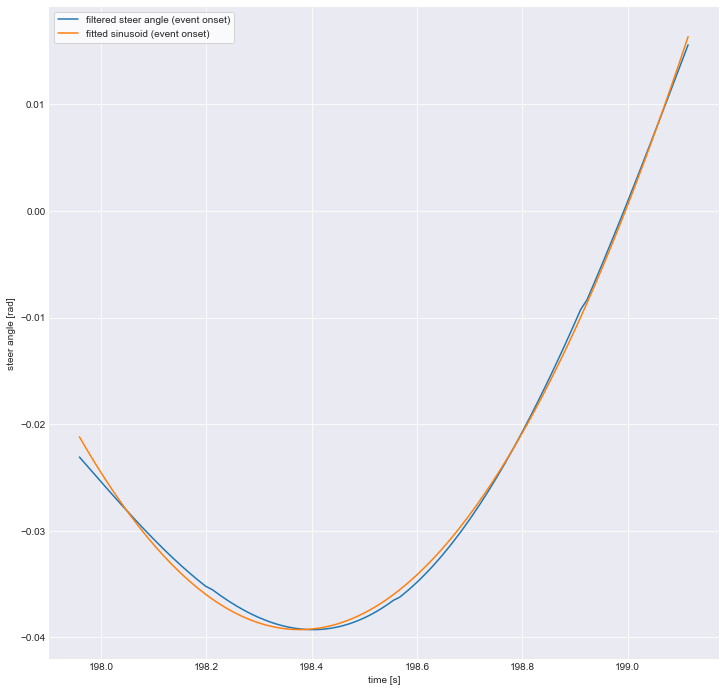

rider 1, trial 2
{'mean': '-0.011', 'amplitude': '-0.045', 'frequency': '0.282', 'phase': '-288.391'}


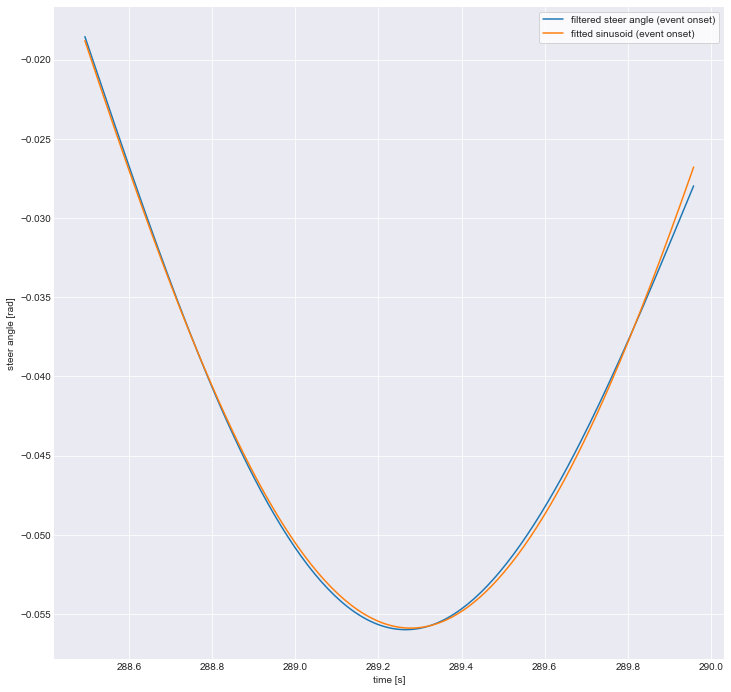

rider 1, trial 6
{'mean': '0.005', 'amplitude': '-0.066', 'frequency': '0.358', 'phase': '-770.449'}


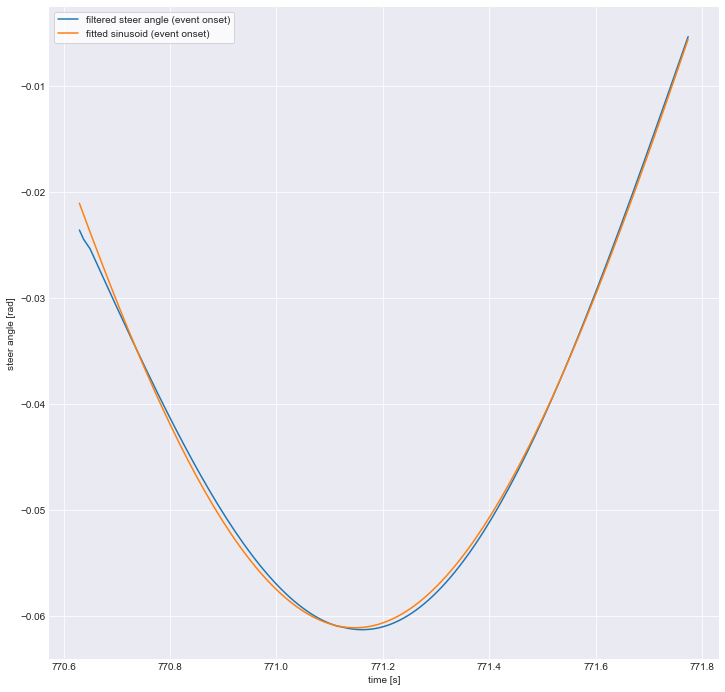

rider 1, trial 7
{'mean': '0.025', 'amplitude': '-0.062', 'frequency': '0.217', 'phase': '-846.254'}


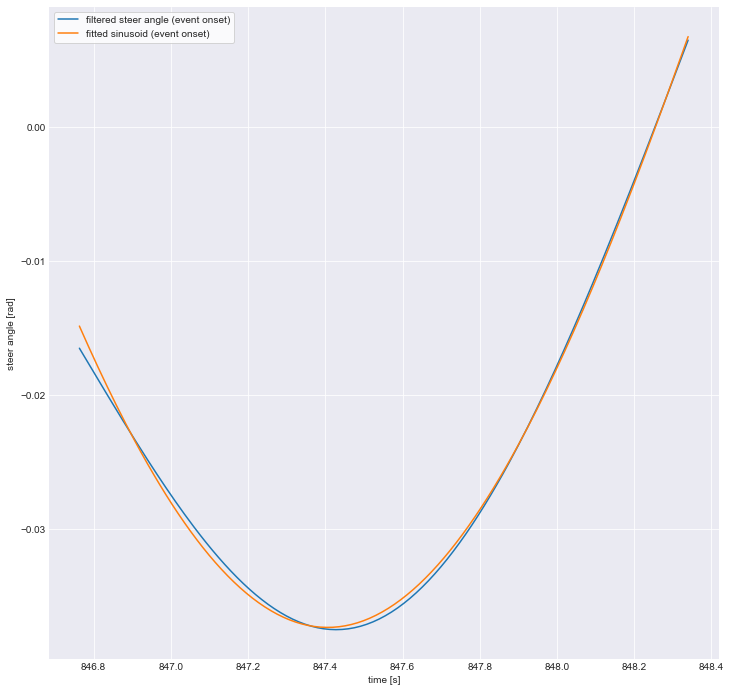

rider 1, trial 8
{'mean': '0.014', 'amplitude': '-0.078', 'frequency': '0.213', 'phase': '-929.728'}


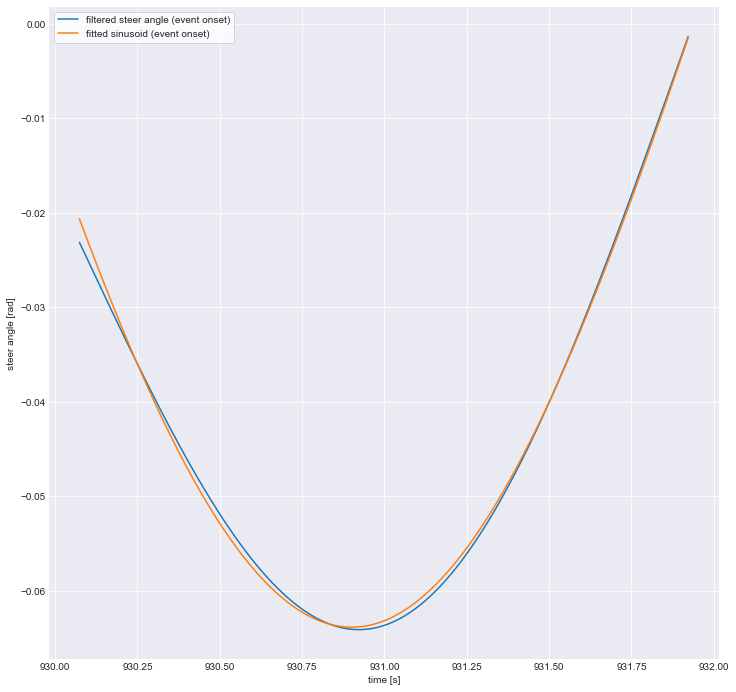

rider 1, trial 12
{'mean': '1.764', 'amplitude': '-1.785', 'frequency': '0.022', 'phase': '-1251.813'}


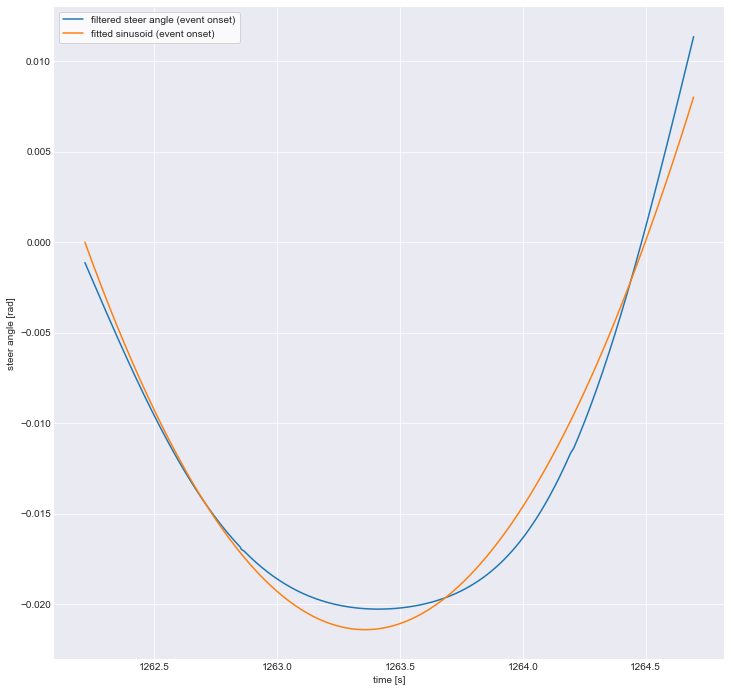

rider 1, trial 13
{'mean': '0.140', 'amplitude': '-0.171', 'frequency': '0.191', 'phase': '-1345.360'}


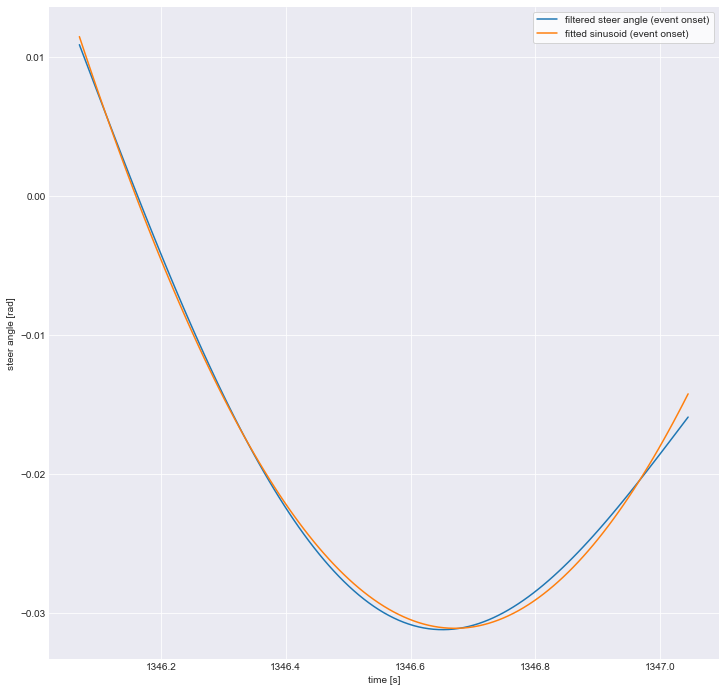

rider 1, trial 14
{'mean': '-0.004', 'amplitude': '-0.036', 'frequency': '0.215', 'phase': '-1430.038'}


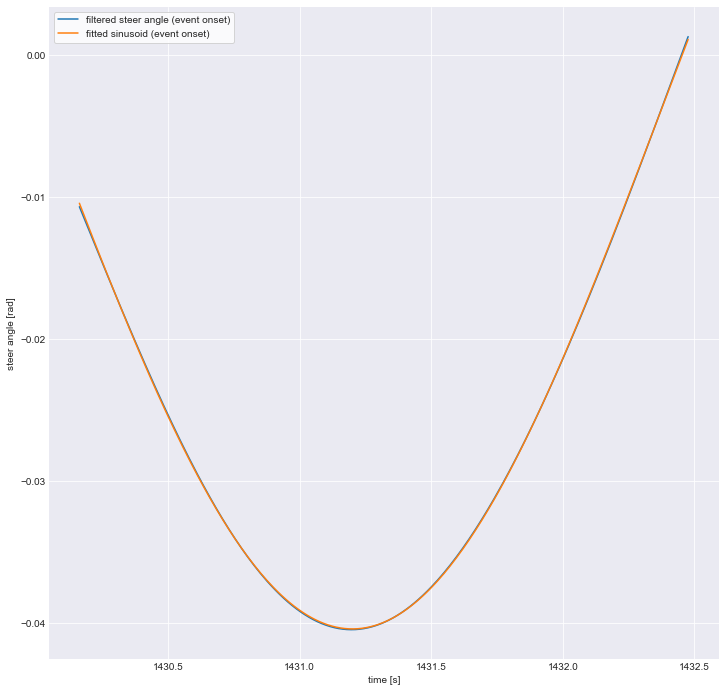

rider 2, trial 3
{'mean': '1.713', 'amplitude': '-1.781', 'frequency': '0.092', 'phase': '-592.885'}


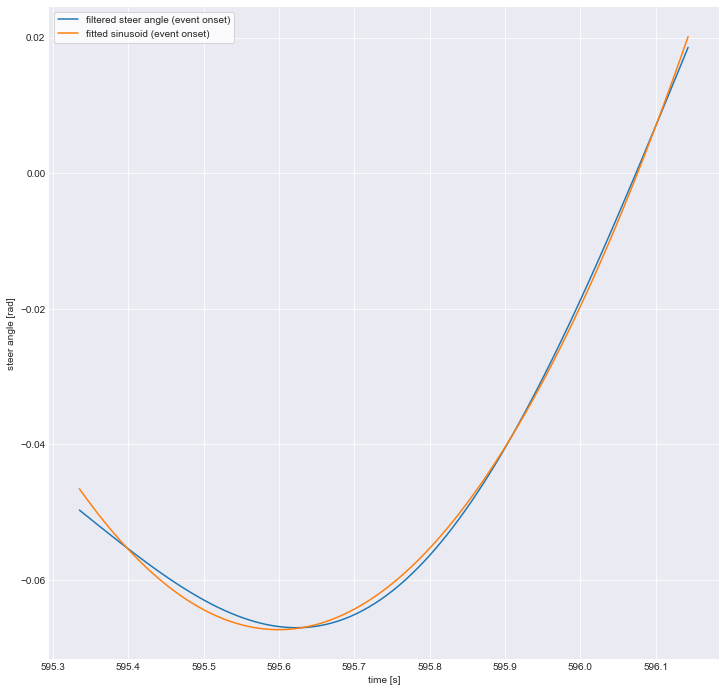

rider 2, trial 4
{'mean': '0.050', 'amplitude': '-0.095', 'frequency': '0.223', 'phase': '-675.807'}


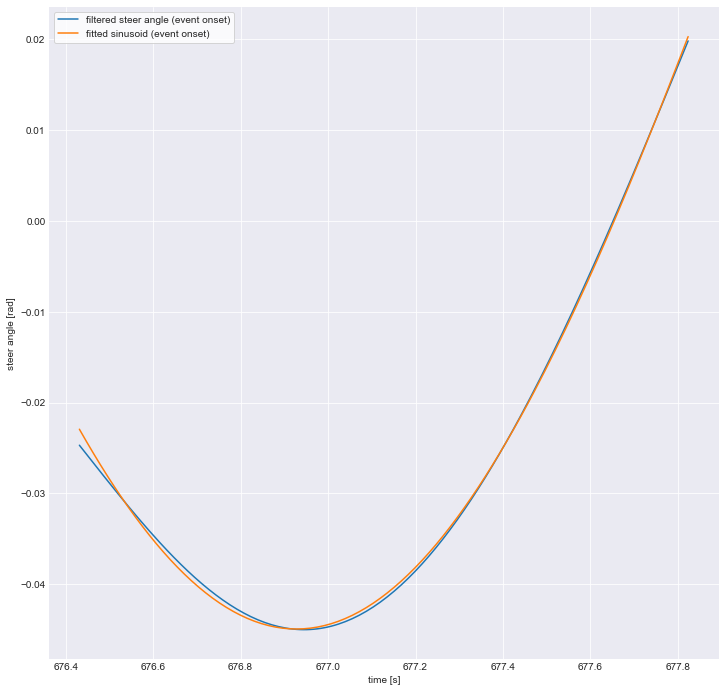

rider 2, trial 5
{'mean': '-0.029', 'amplitude': '-0.077', 'frequency': '0.378', 'phase': '-829.770'}


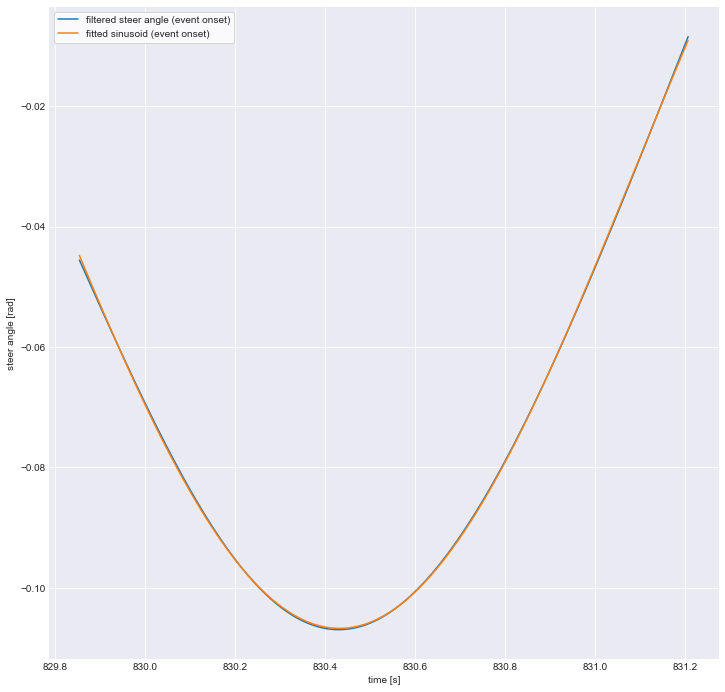

rider 2, trial 9
{'mean': '0.157', 'amplitude': '-0.184', 'frequency': '0.138', 'phase': '-1115.919'}


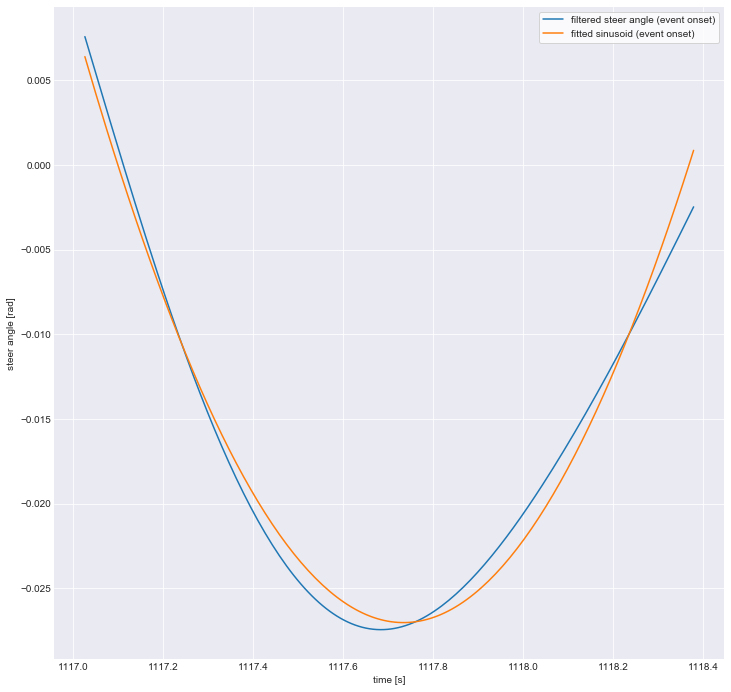

rider 2, trial 10
{'mean': '2.183', 'amplitude': '-2.240', 'frequency': '0.043', 'phase': '-1189.555'}


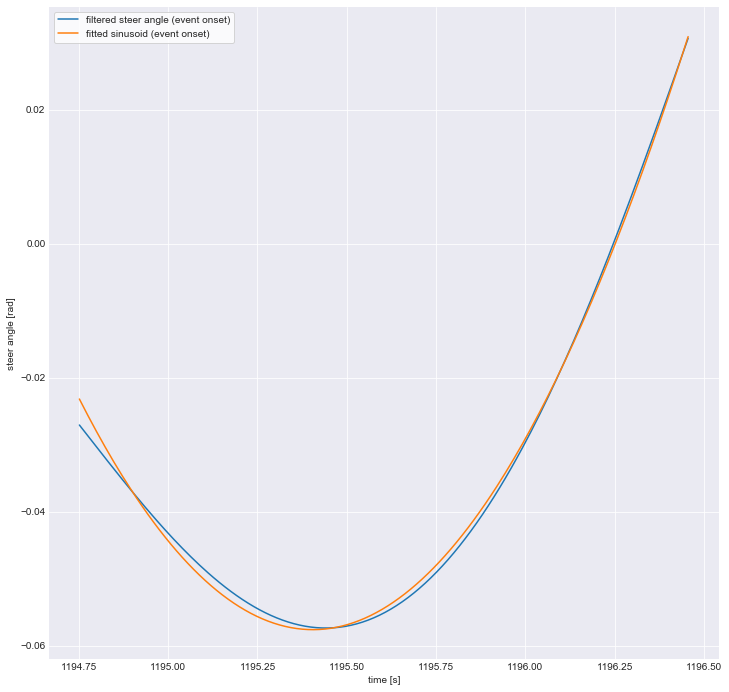

rider 2, trial 11
{'mean': '0.304', 'amplitude': '-0.431', 'frequency': '0.158', 'phase': '-1282.319'}


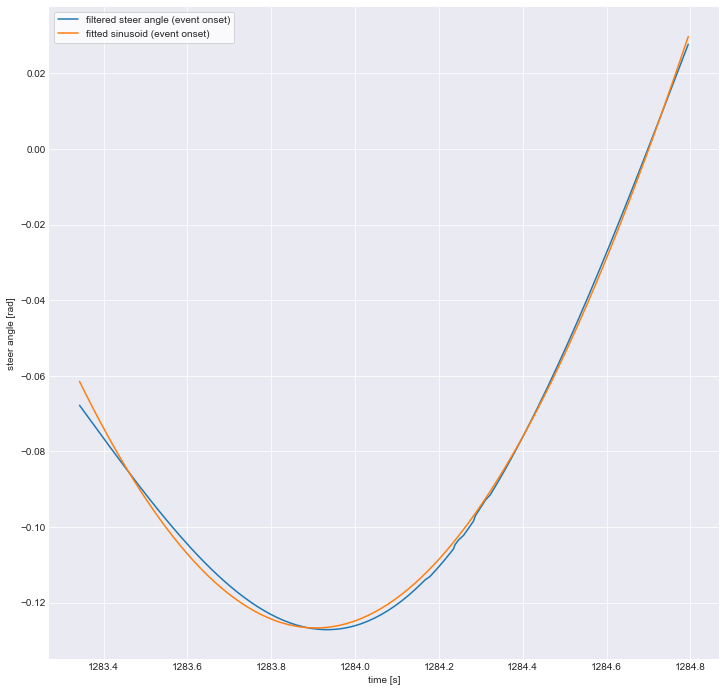

rider 2, trial 15
{'mean': '-0.025', 'amplitude': '-0.150', 'frequency': '0.245', 'phase': '-1569.835'}


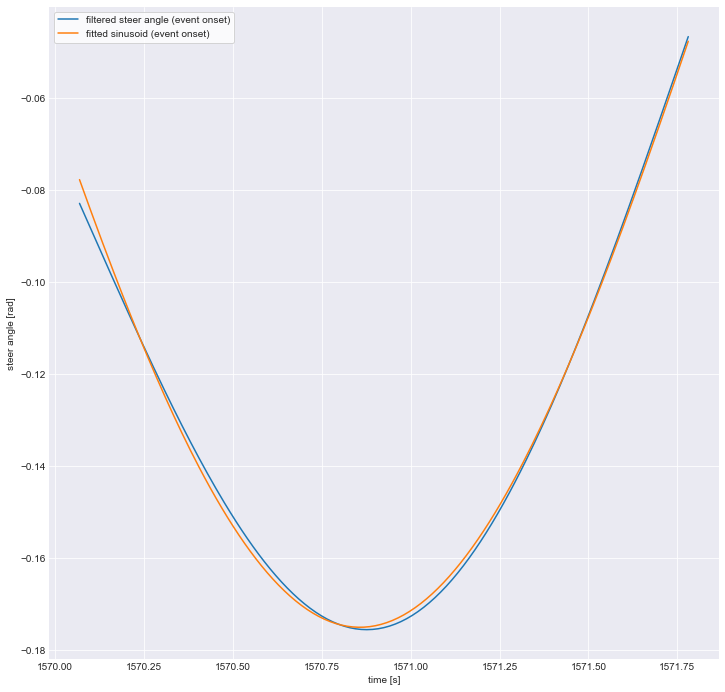

rider 2, trial 16
{'mean': '0.019', 'amplitude': '-0.090', 'frequency': '0.370', 'phase': '-1650.892'}


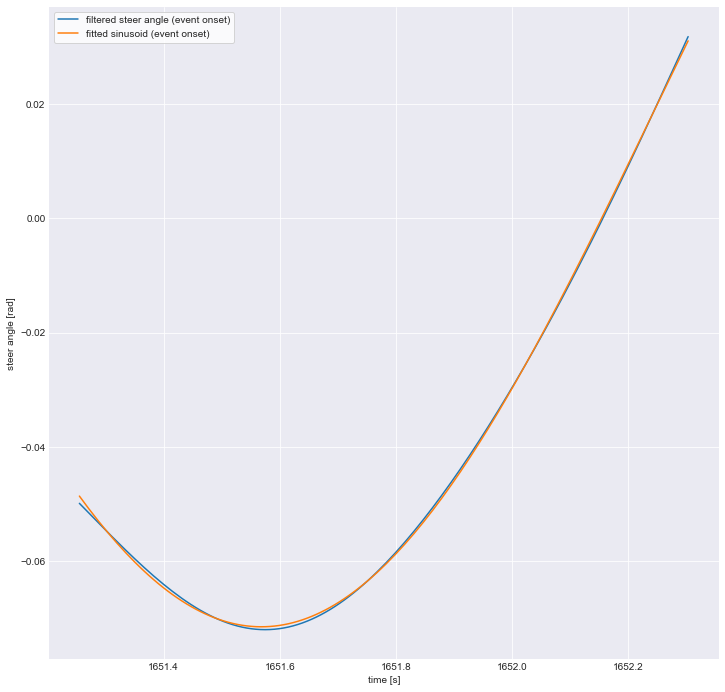

rider 2, trial 17
{'mean': '5.933', 'amplitude': '-6.050', 'frequency': '0.054', 'phase': '-1727.632'}


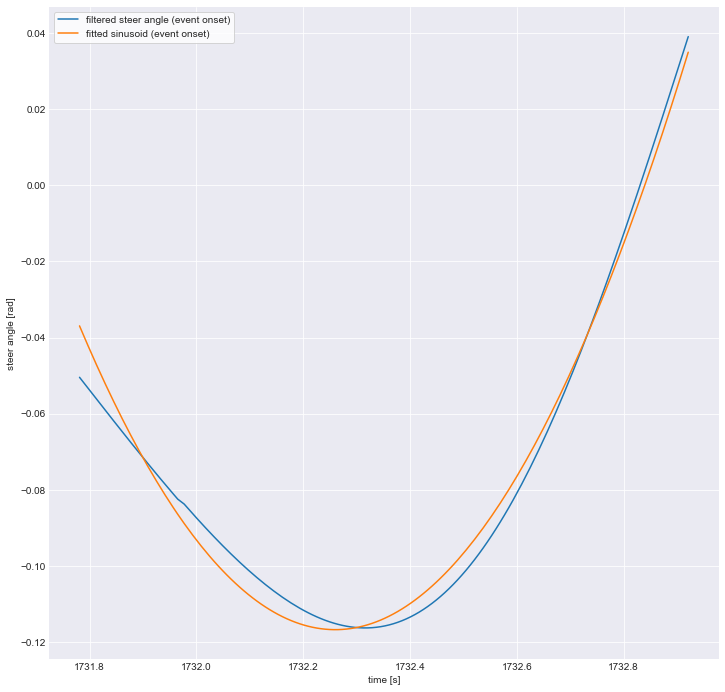

rider 3, trial 0
{'mean': '0.042', 'amplitude': '-0.120', 'frequency': '0.278', 'phase': '-92.982'}


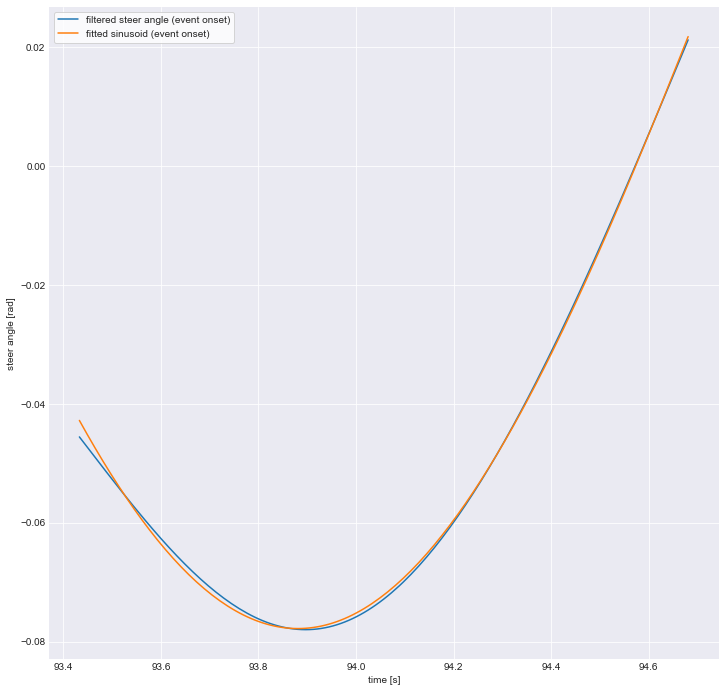

rider 3, trial 1
{'mean': '0.015', 'amplitude': '-0.087', 'frequency': '0.279', 'phase': '-187.279'}


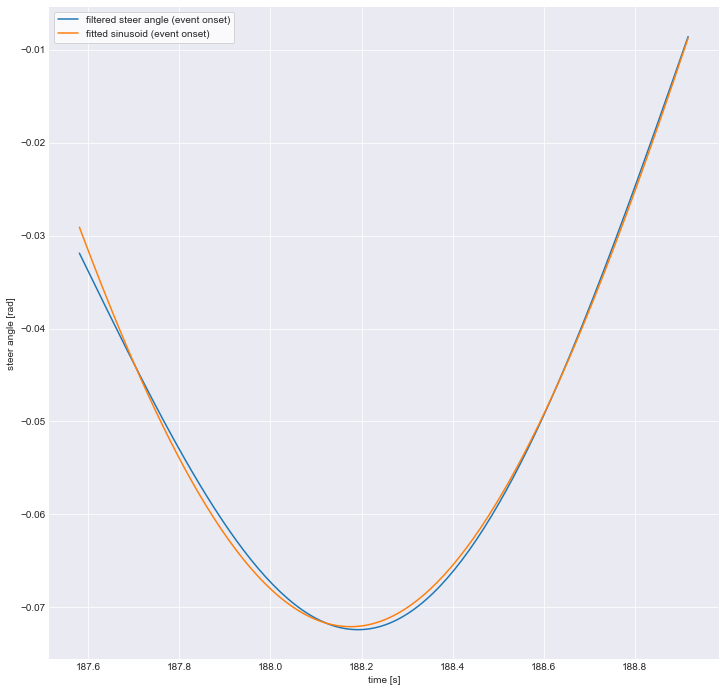

rider 3, trial 2
{'mean': '0.068', 'amplitude': '-0.174', 'frequency': '0.213', 'phase': '-293.969'}


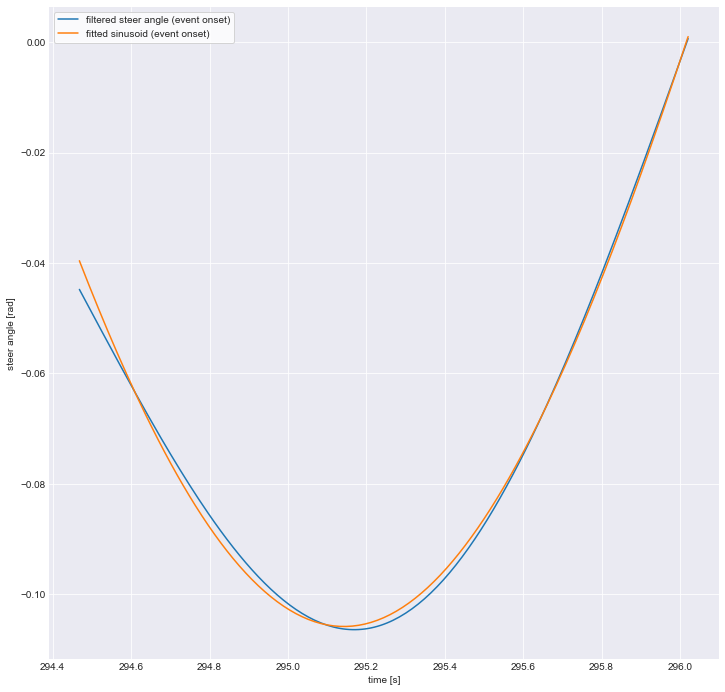

rider 3, trial 6
{'mean': '2.750', 'amplitude': '-2.796', 'frequency': '0.035', 'phase': '-647.041'}


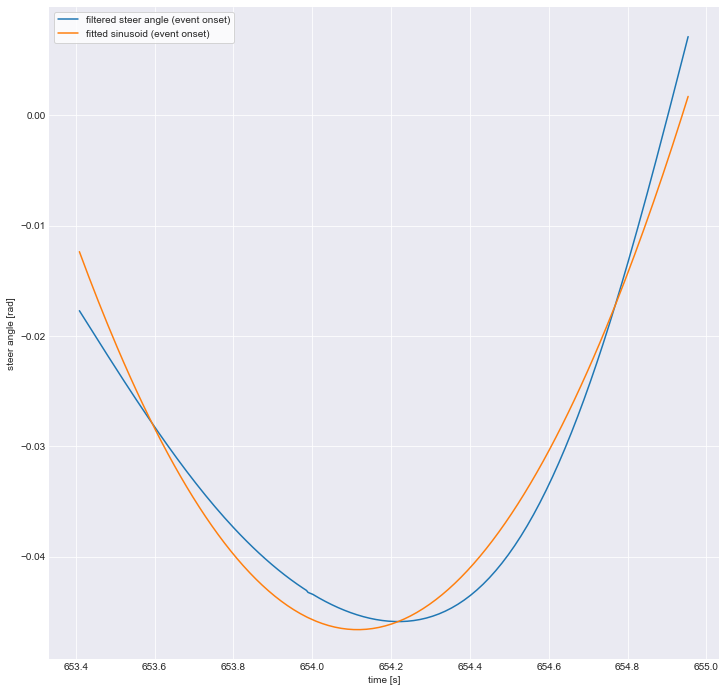

rider 3, trial 7
{'mean': '2.845', 'amplitude': '-2.911', 'frequency': '0.038', 'phase': '-742.970'}


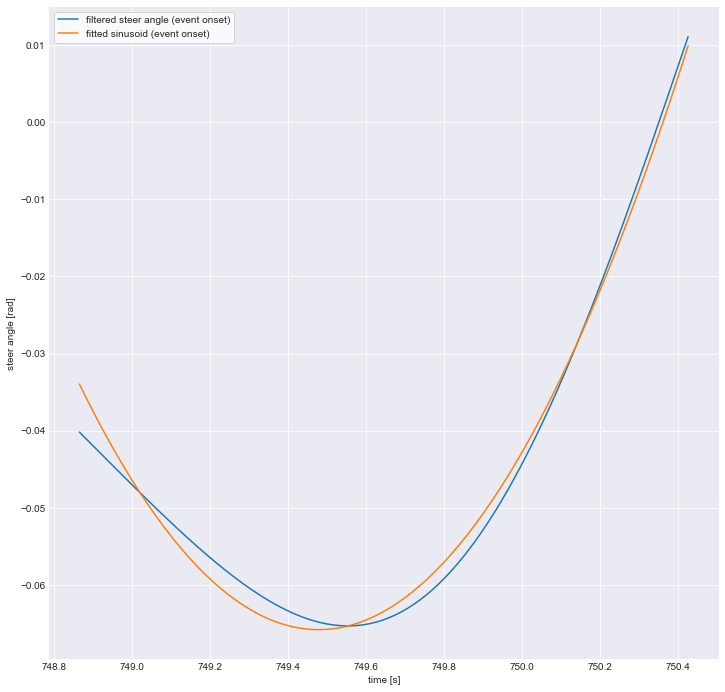

rider 3, trial 8
{'mean': '-0.009', 'amplitude': '-0.026', 'frequency': '0.151', 'phase': '-848.633'}


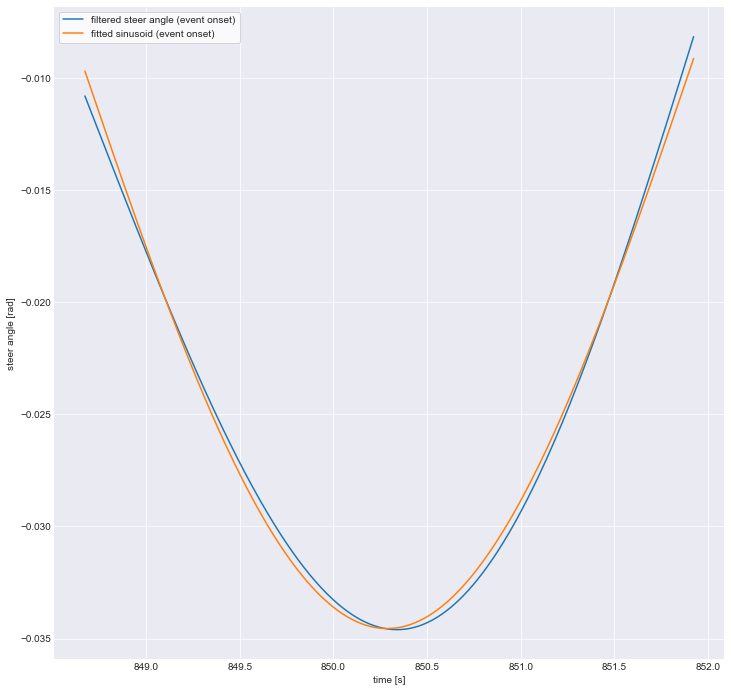

rider 3, trial 12
{'mean': '-0.007', 'amplitude': '-0.027', 'frequency': '0.224', 'phase': '-1205.955'}


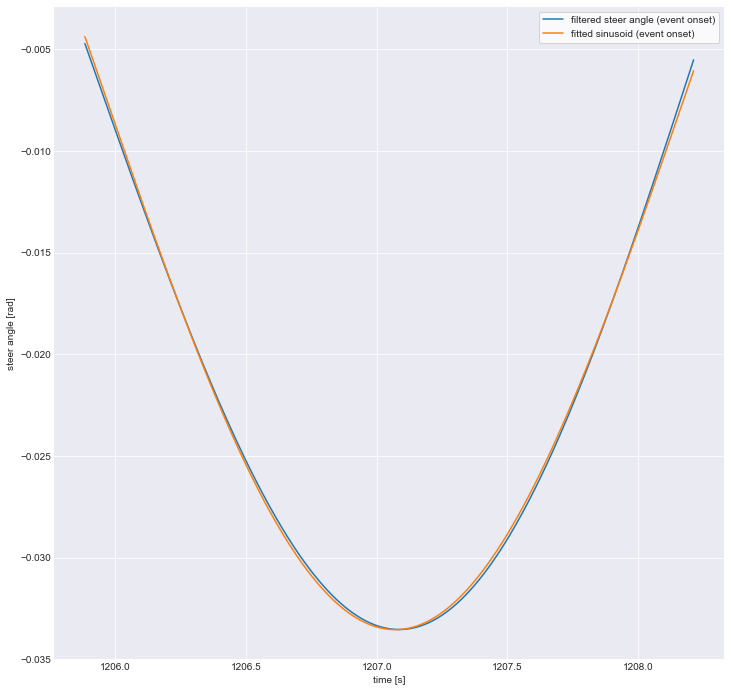

rider 3, trial 13
{'mean': '0.190', 'amplitude': '-0.227', 'frequency': '0.090', 'phase': '-1302.733'}


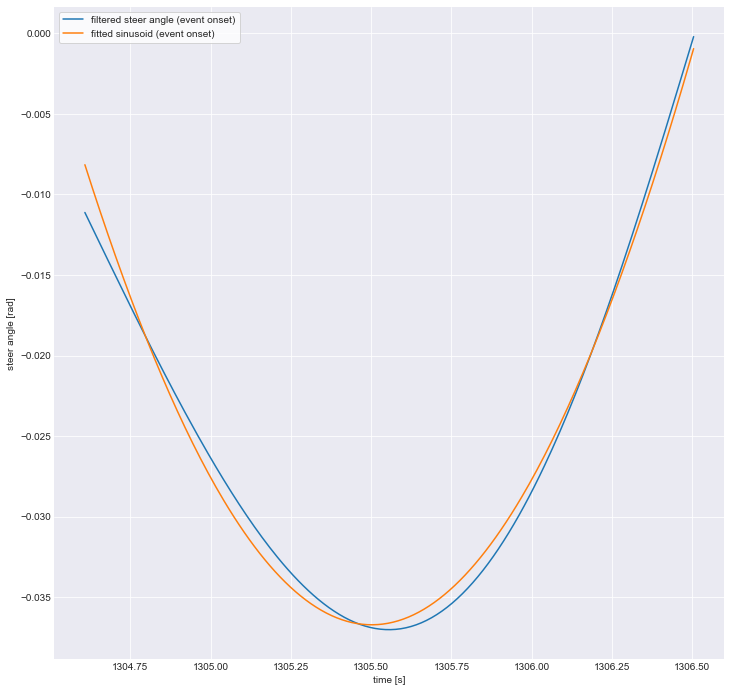

rider 3, trial 14
{'mean': '-0.039', 'amplitude': '-0.082', 'frequency': '0.589', 'phase': '-1399.581'}


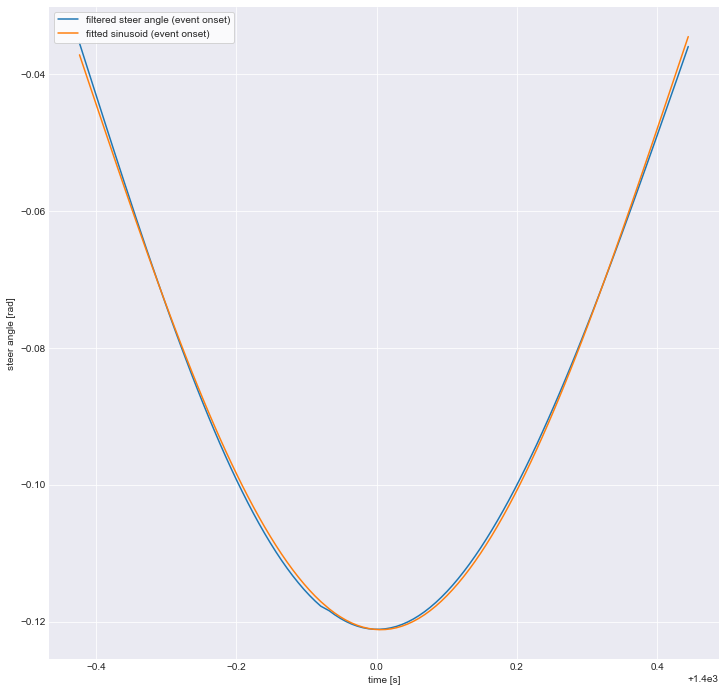

rider 4, trial 3
{'mean': '0.193', 'amplitude': '-0.307', 'frequency': '0.309', 'phase': '-367.549'}


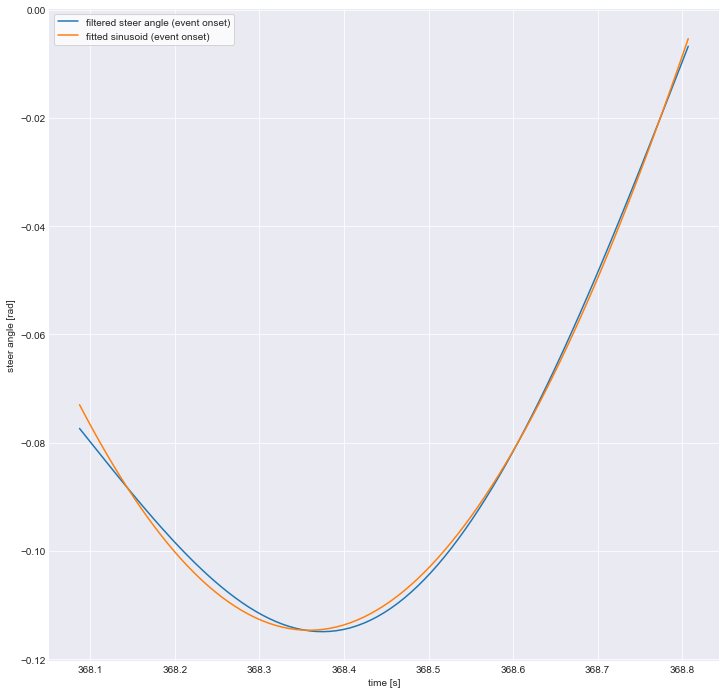

rider 4, trial 4
{'mean': '2.526', 'amplitude': '-2.618', 'frequency': '0.056', 'phase': '-446.289'}


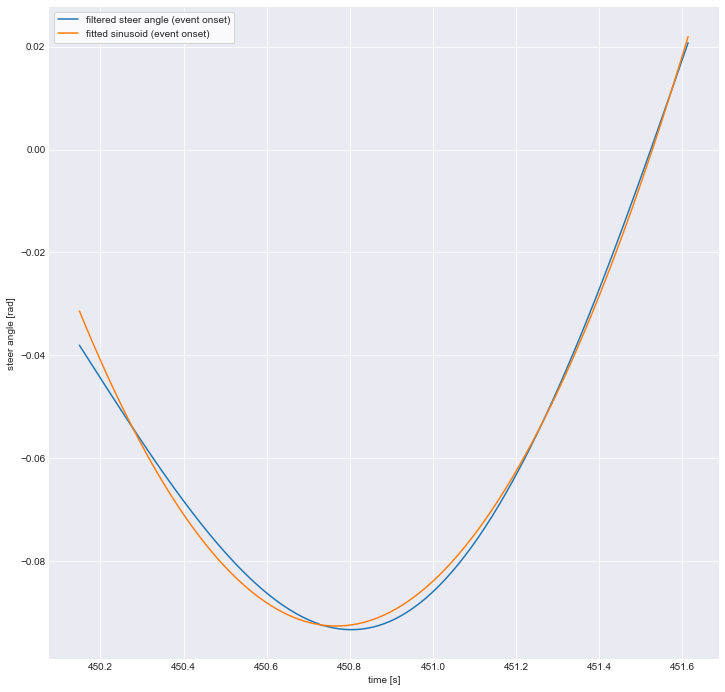

rider 4, trial 5
{'mean': '-0.025', 'amplitude': '-0.053', 'frequency': '0.297', 'phase': '-538.056'}


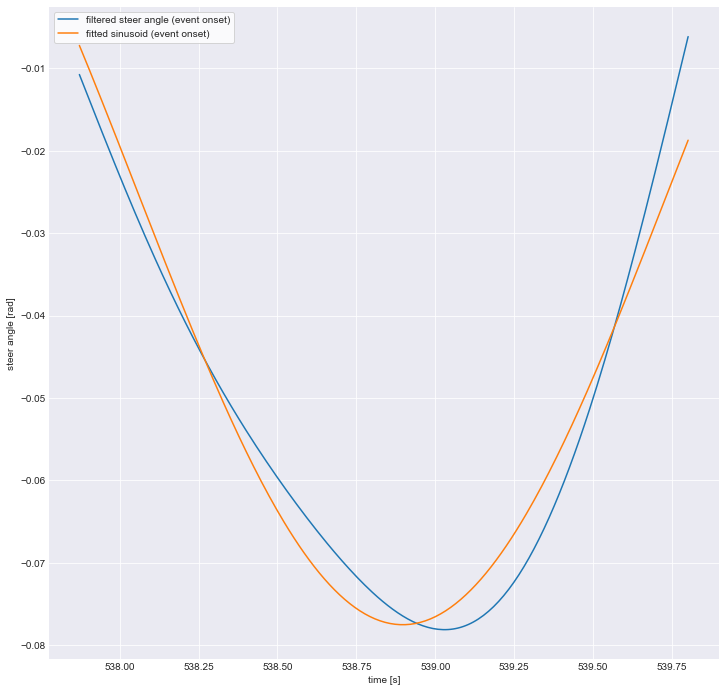

rider 4, trial 9
{'mean': '-0.029', 'amplitude': '-0.062', 'frequency': '0.391', 'phase': '-876.427'}


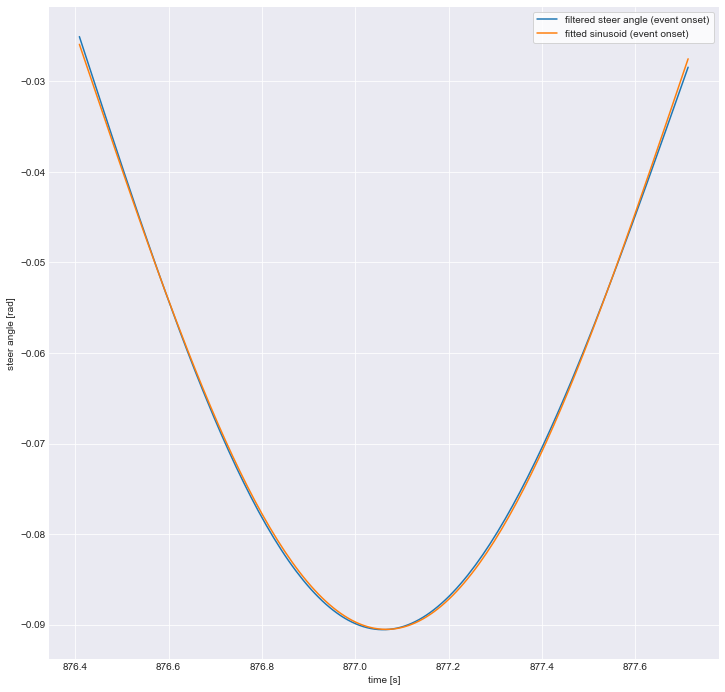

rider 4, trial 10
{'mean': '3.650', 'amplitude': '-3.704', 'frequency': '0.045', 'phase': '-957.137'}


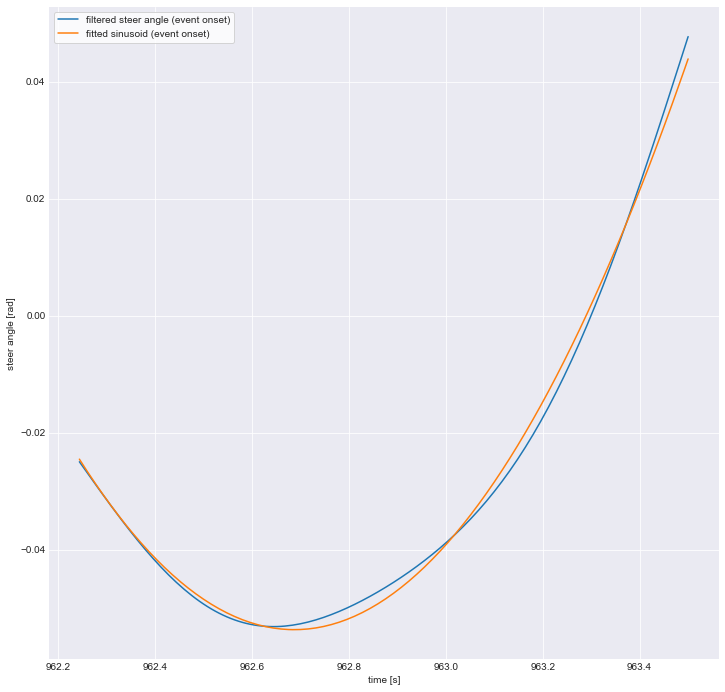

rider 4, trial 11
{'mean': '0.089', 'amplitude': '-0.209', 'frequency': '0.315', 'phase': '-1043.739'}


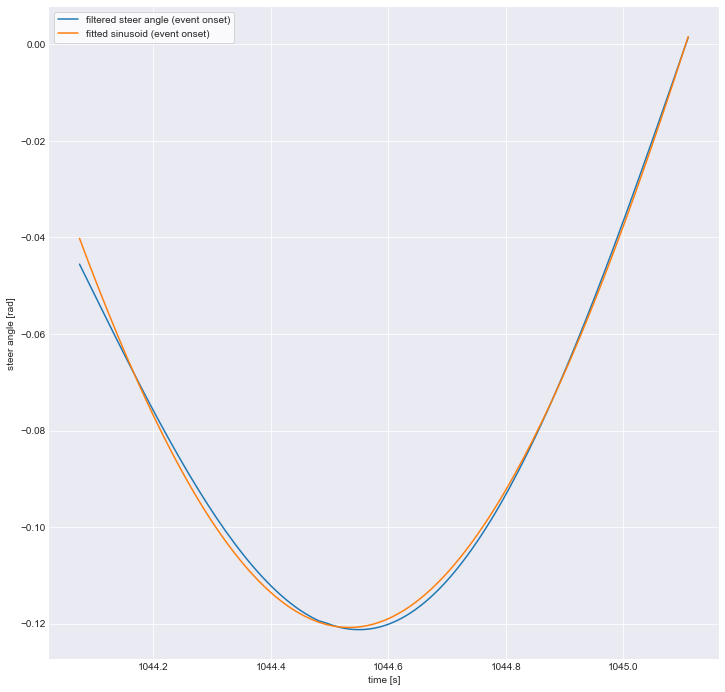

rider 4, trial 15
{'mean': '0.016', 'amplitude': '-0.025', 'frequency': '0.299', 'phase': '-1347.504'}


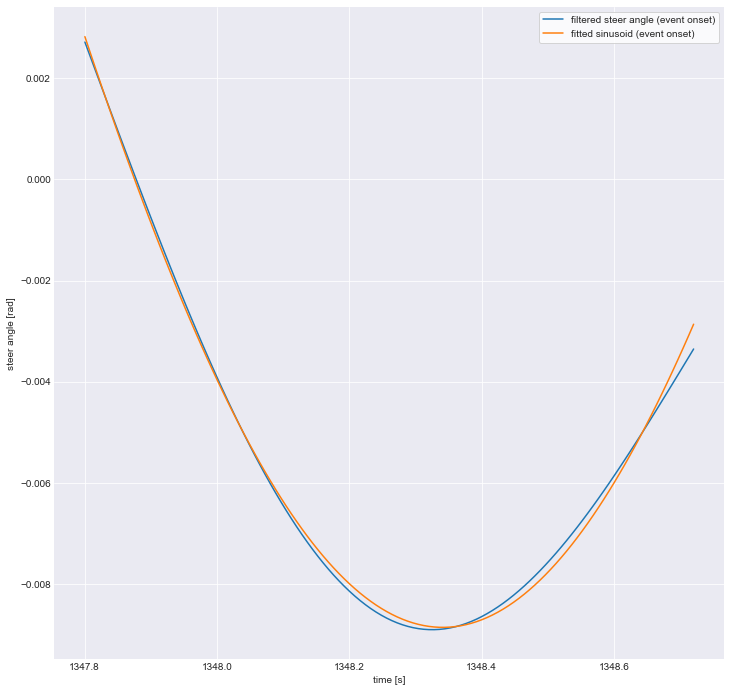

rider 4, trial 16
{'mean': '1.574', 'amplitude': '-1.625', 'frequency': '0.054', 'phase': '-1423.257'}


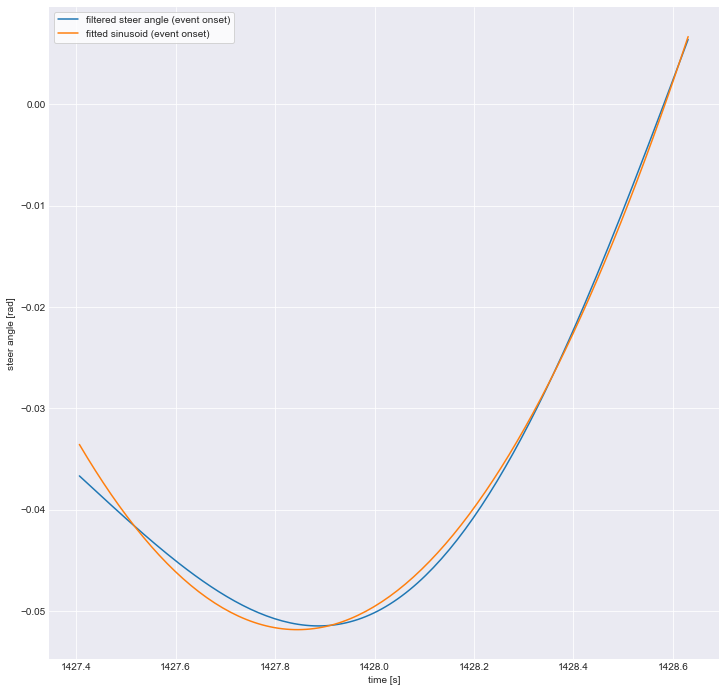

rider 4, trial 17
{'mean': '0.488', 'amplitude': '-0.556', 'frequency': '0.078', 'phase': '-1522.517'}


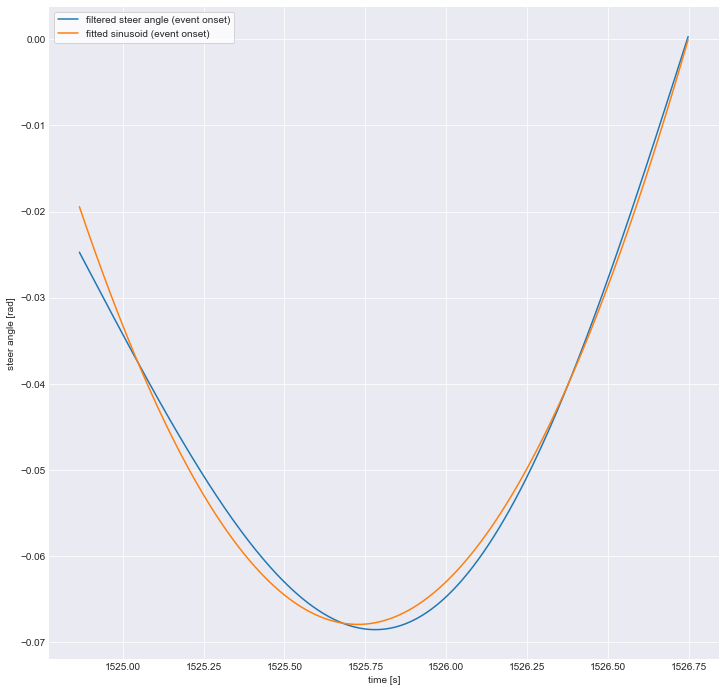

rider 5, trial 0
{'mean': '0.004', 'amplitude': '-0.039', 'frequency': '0.257', 'phase': '-200.844'}


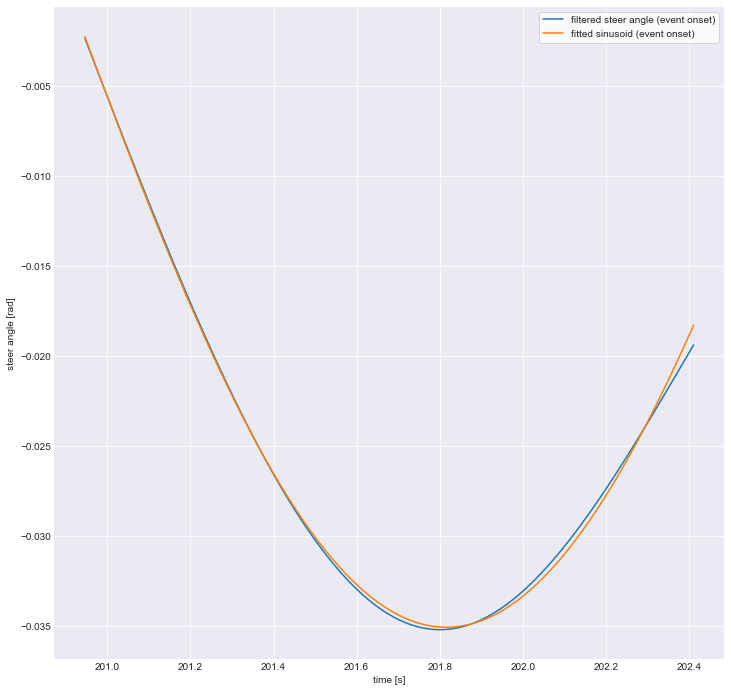

rider 5, trial 1
{'mean': '-0.011', 'amplitude': '-0.059', 'frequency': '0.550', 'phase': '-268.284'}


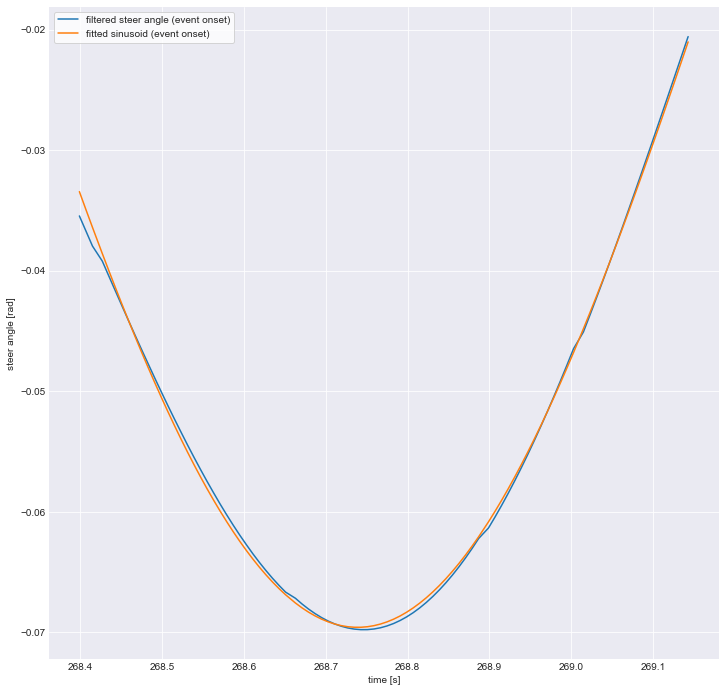

rider 5, trial 2
{'mean': '-0.002', 'amplitude': '-0.021', 'frequency': '0.210', 'phase': '-328.913'}


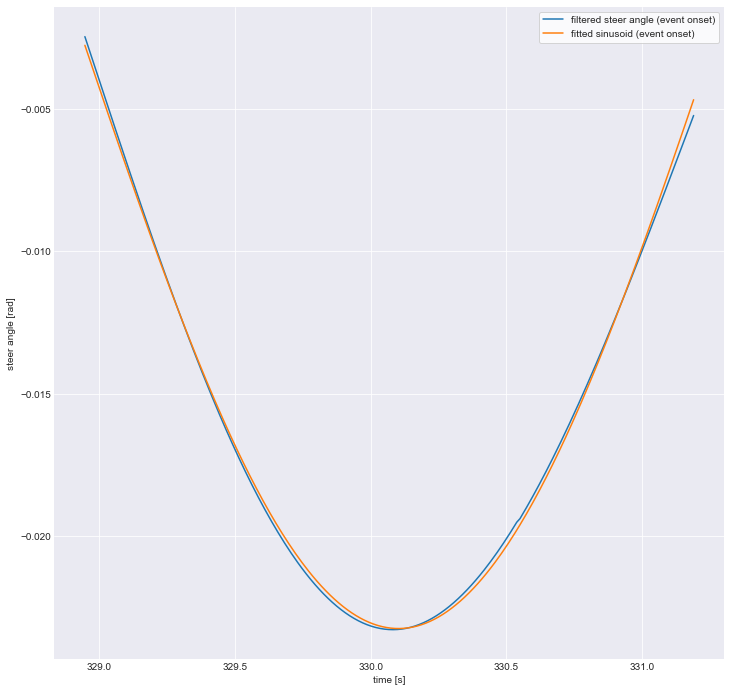

rider 5, trial 6
{'mean': '-0.000', 'amplitude': '-0.019', 'frequency': '0.294', 'phase': '-591.205'}


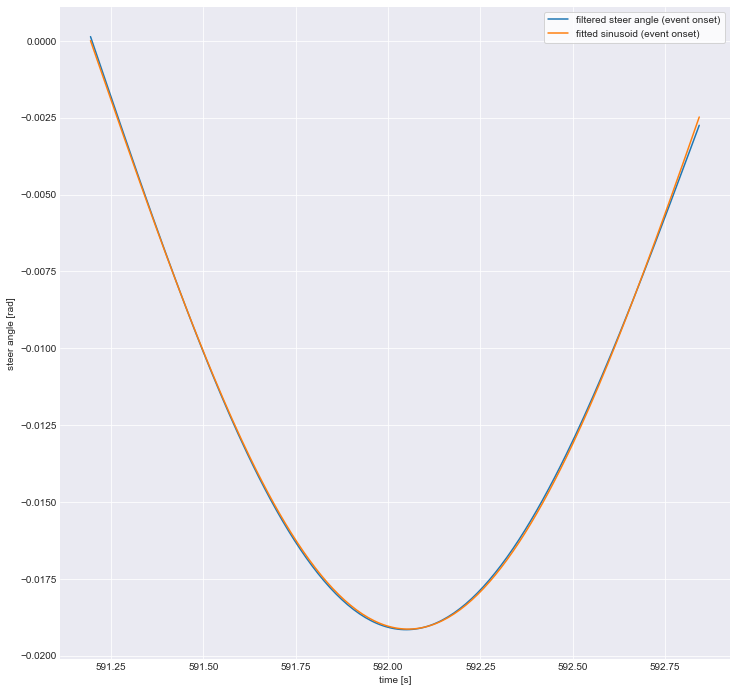

rider 5, trial 7
{'mean': '0.054', 'amplitude': '-0.075', 'frequency': '0.132', 'phase': '-660.073'}


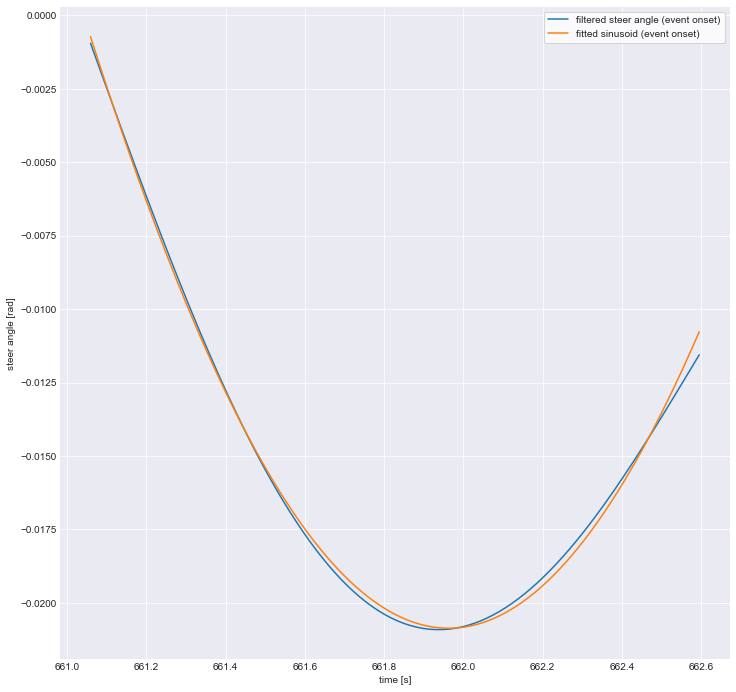

rider 5, trial 8
{'mean': '1.841', 'amplitude': '-1.879', 'frequency': '0.041', 'phase': '-720.354'}


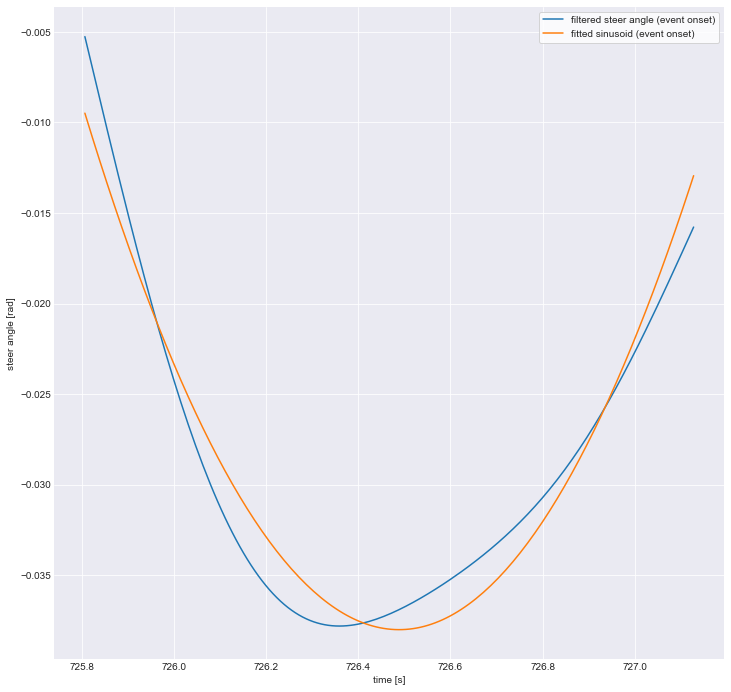

rider 5, trial 12
{'mean': '1.628', 'amplitude': '-1.657', 'frequency': '0.038', 'phase': '-954.647'}


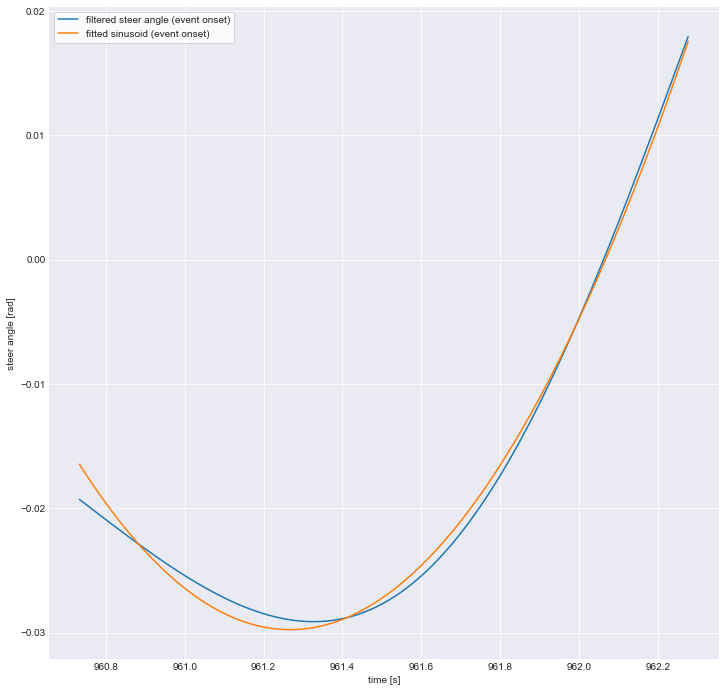

rider 5, trial 13
{'mean': '1.175', 'amplitude': '-1.193', 'frequency': '0.024', 'phase': '-1019.838'}


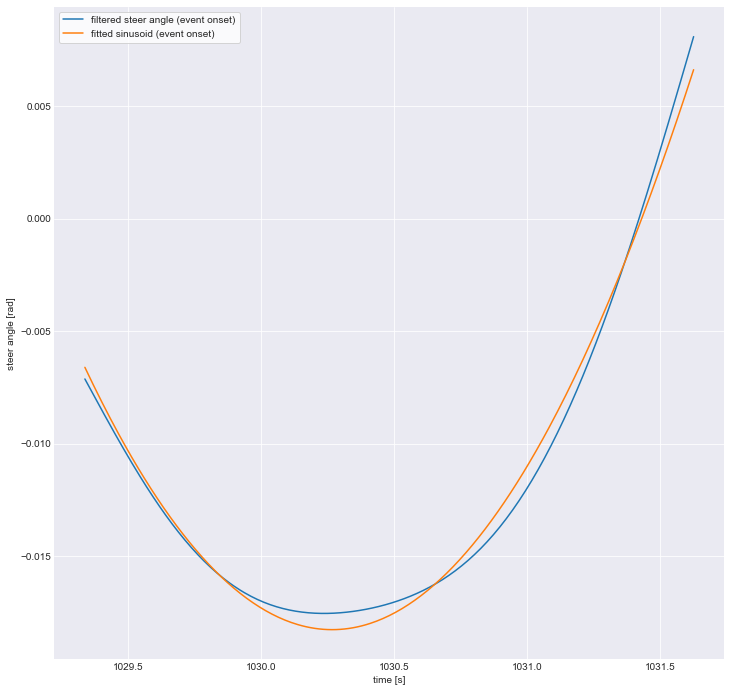

rider 5, trial 14
{'mean': '-0.002', 'amplitude': '-0.027', 'frequency': '0.216', 'phase': '-1096.167'}


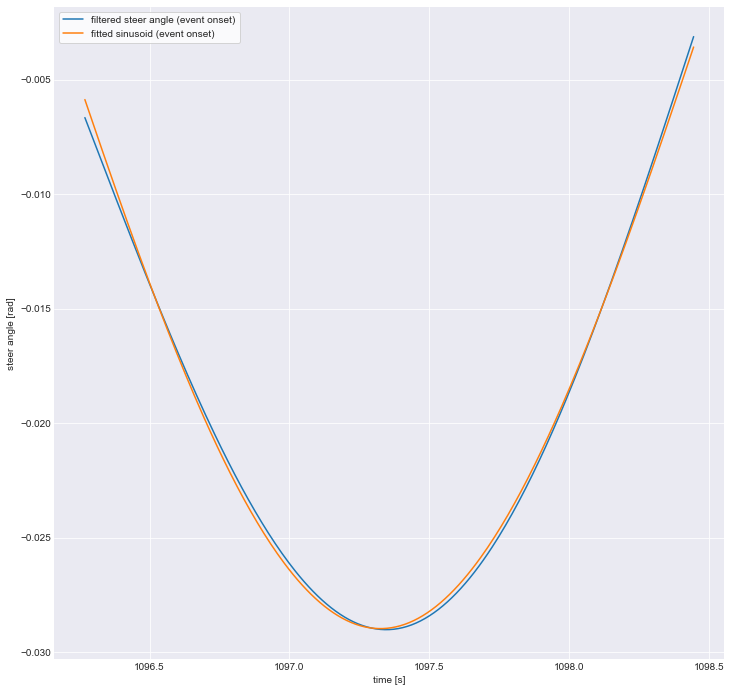

rider 5, trial 16
{'mean': '2.200', 'amplitude': '-2.249', 'frequency': '0.035', 'phase': '-1223.309'}


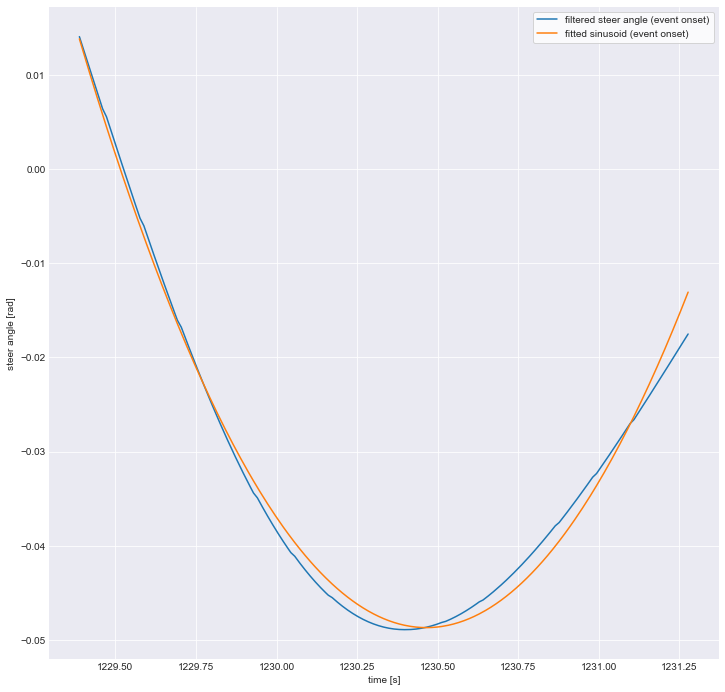

rider 6, trial 3
{'mean': '0.016', 'amplitude': '-0.031', 'frequency': '0.227', 'phase': '-418.896'}


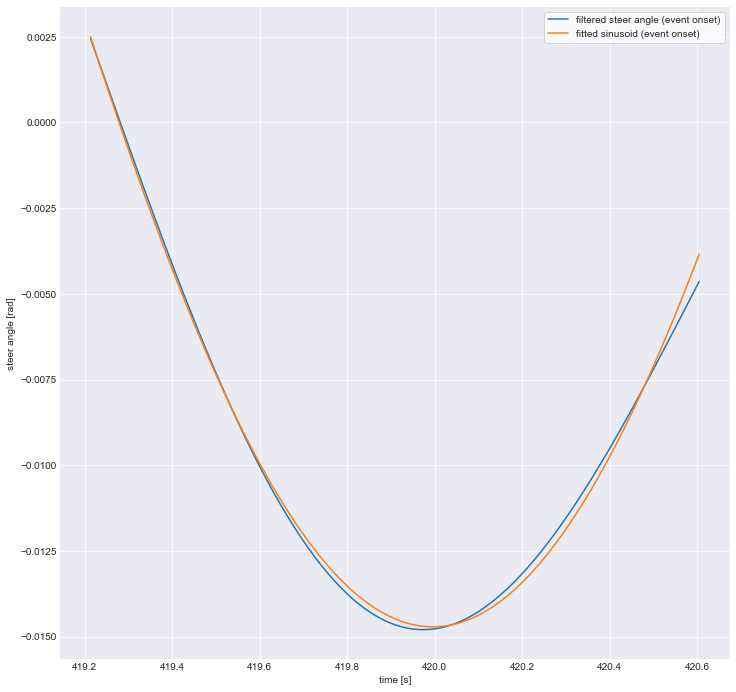

rider 6, trial 4
{'mean': '0.007', 'amplitude': '-0.049', 'frequency': '0.335', 'phase': '-519.764'}


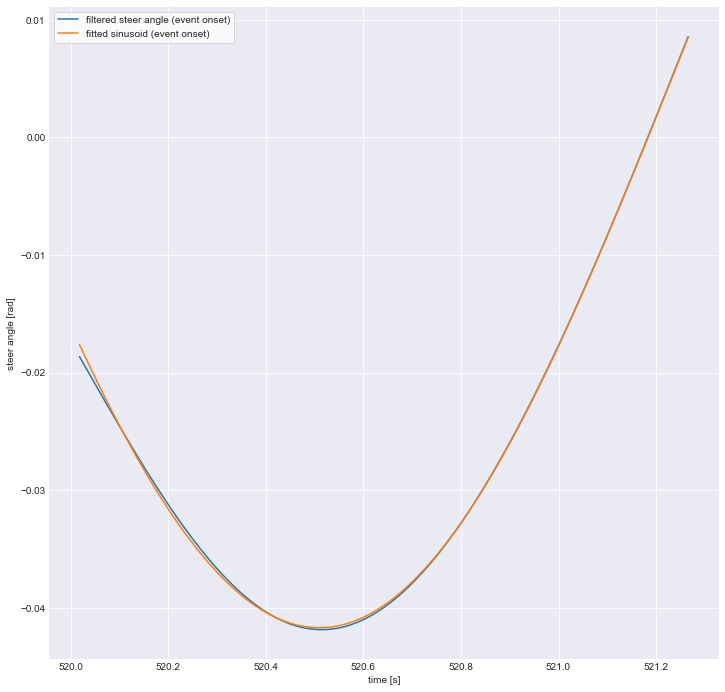

rider 6, trial 5
{'mean': '0.048', 'amplitude': '-0.108', 'frequency': '0.212', 'phase': '-610.311'}


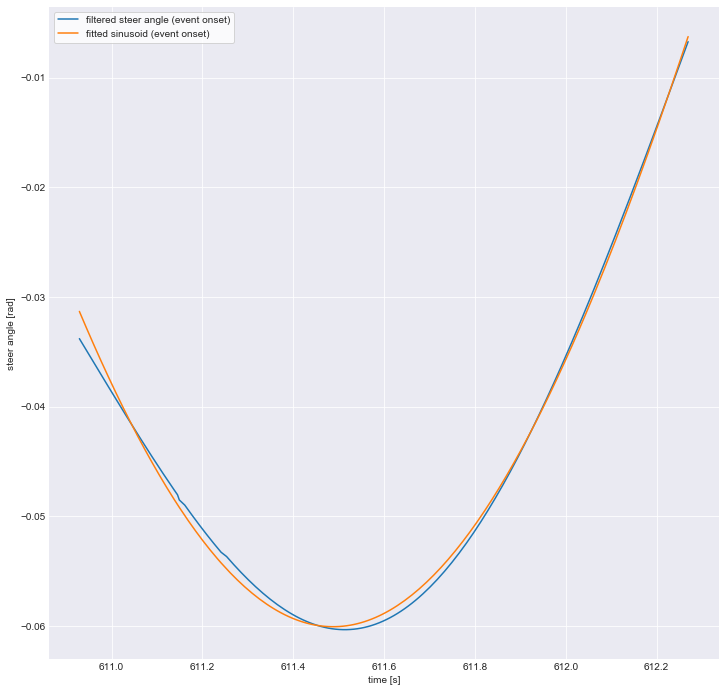

rider 6, trial 9
{'mean': '-0.010', 'amplitude': '-0.058', 'frequency': '0.404', 'phase': '-964.992'}


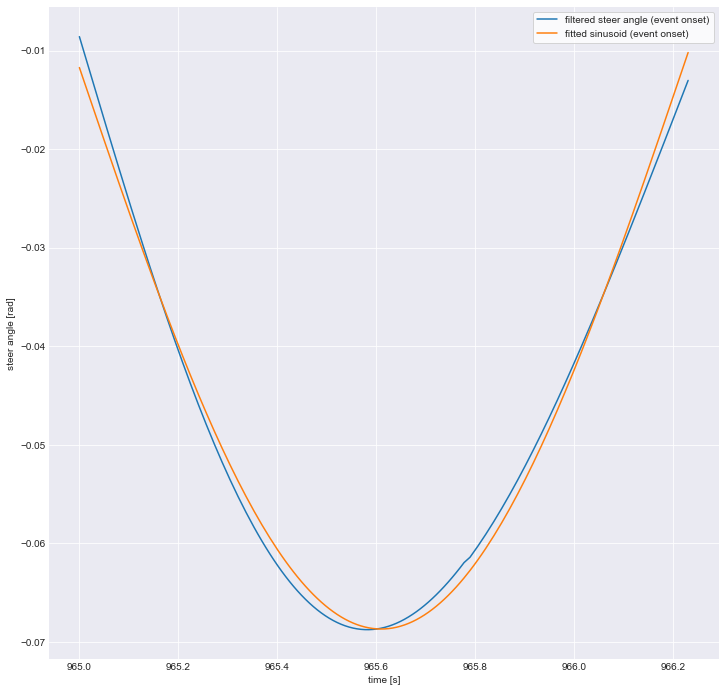

rider 6, trial 10
{'mean': '0.109', 'amplitude': '-0.152', 'frequency': '0.170', 'phase': '-1057.574'}


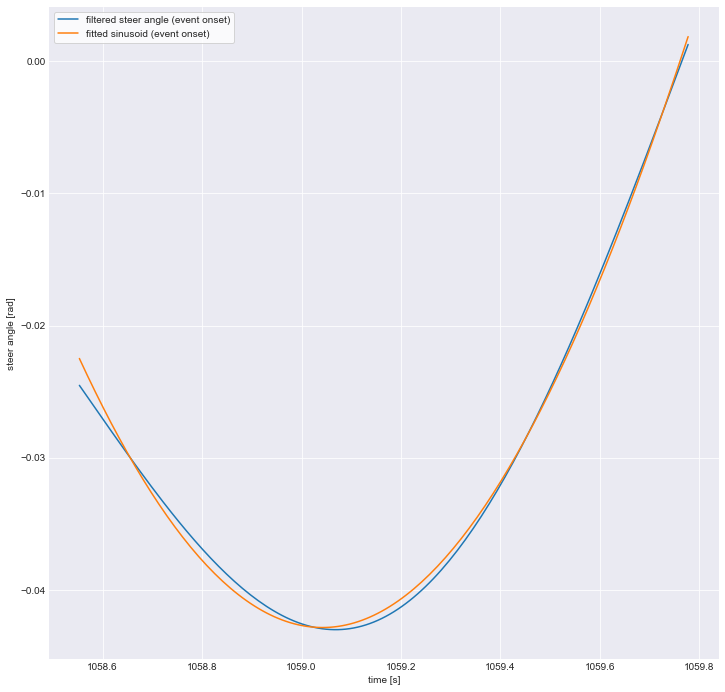

rider 6, trial 11
{'mean': '0.147', 'amplitude': '-0.178', 'frequency': '0.082', 'phase': '-1154.410'}


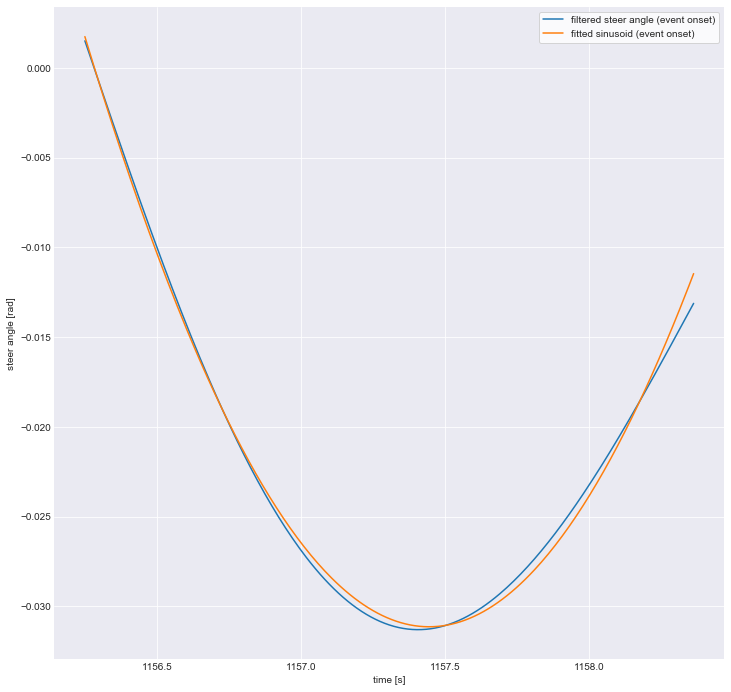

rider 6, trial 15
{'mean': '0.062', 'amplitude': '-0.101', 'frequency': '0.177', 'phase': '-1507.350'}


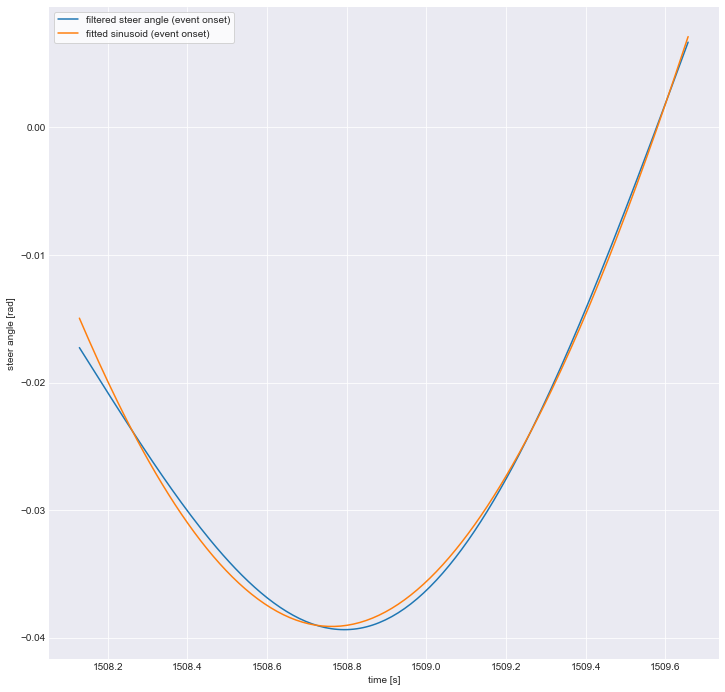

rider 6, trial 16
{'mean': '-0.024', 'amplitude': '-0.022', 'frequency': '0.387', 'phase': '-1601.857'}


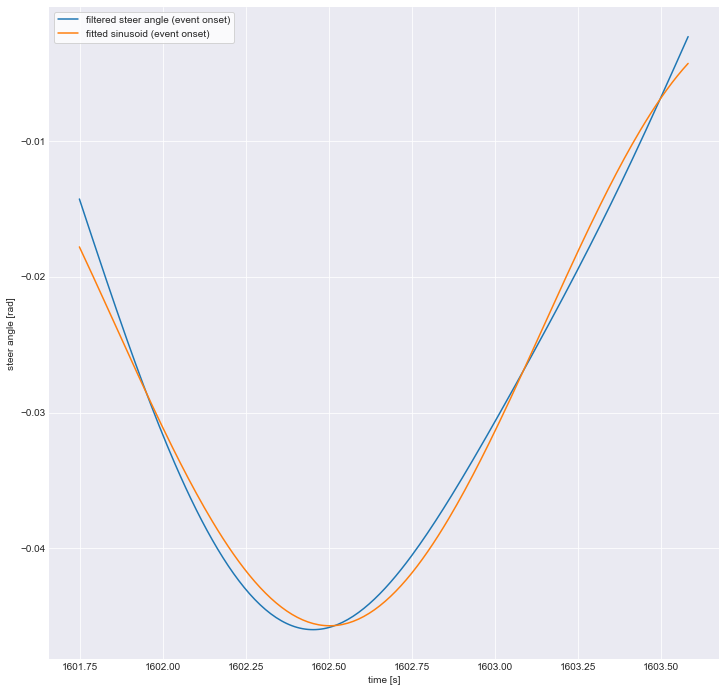

rider 6, trial 17
{'mean': '0.044', 'amplitude': '-0.101', 'frequency': '0.134', 'phase': '-1706.142'}


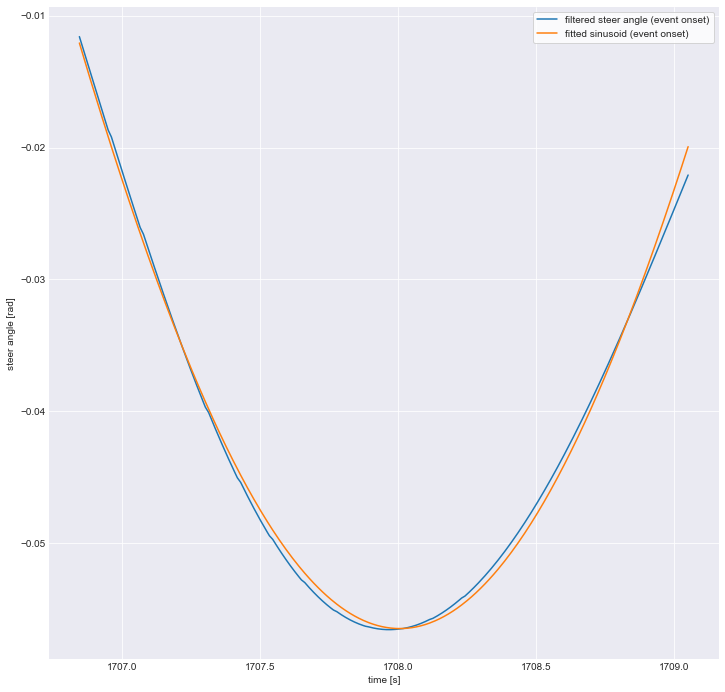

rider 7, trial 0
{'mean': '0.005', 'amplitude': '-0.058', 'frequency': '0.291', 'phase': '-234.874'}


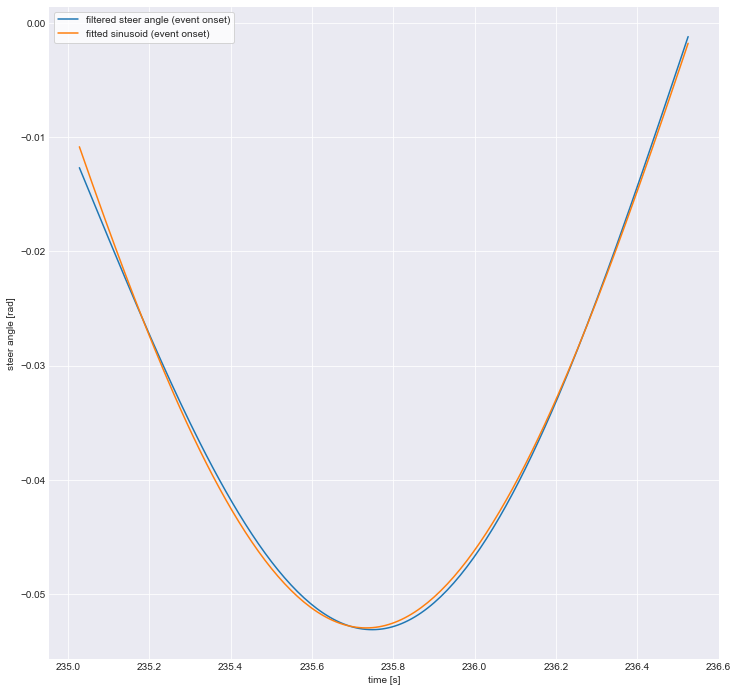

rider 7, trial 1
{'mean': '0.004', 'amplitude': '-0.023', 'frequency': '0.437', 'phase': '-321.843'}


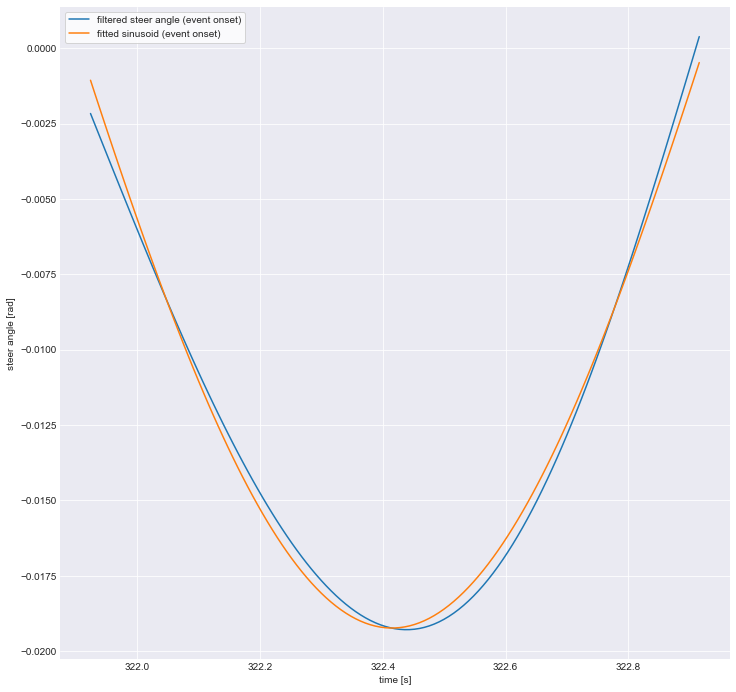

rider 7, trial 2
{'mean': '1.324', 'amplitude': '-1.354', 'frequency': '0.033', 'phase': '-402.827'}


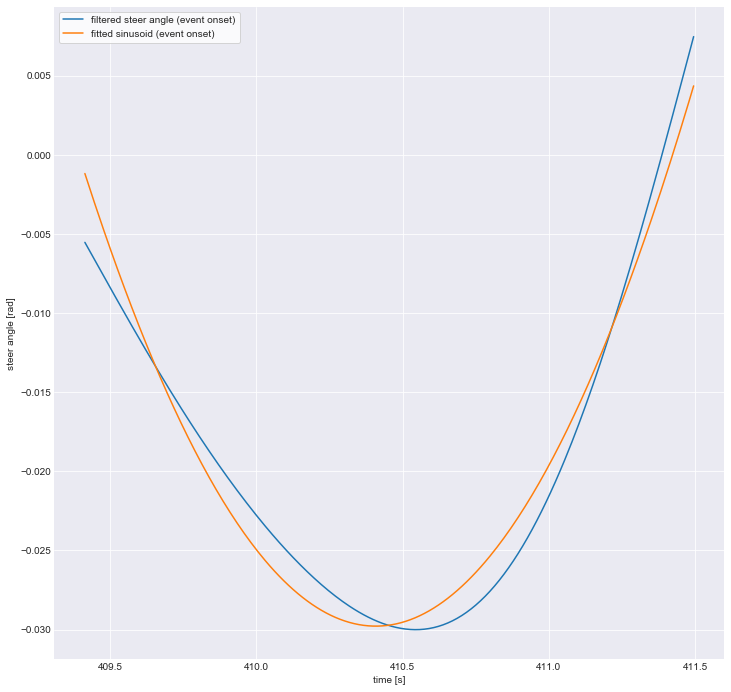

rider 7, trial 6
{'mean': '2.863', 'amplitude': '-2.929', 'frequency': '0.042', 'phase': '-724.170'}


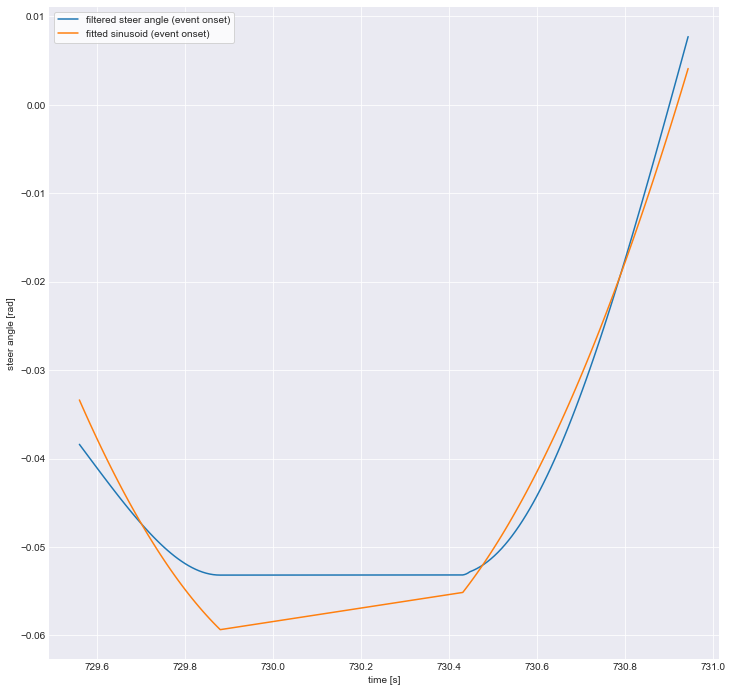

rider 7, trial 7
{'mean': '1.200', 'amplitude': '-1.240', 'frequency': '0.040', 'phase': '-802.528'}


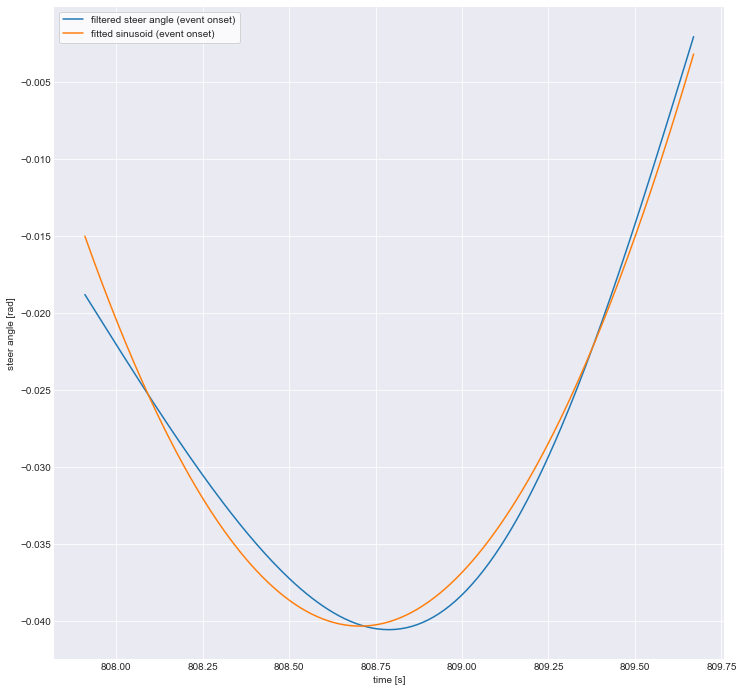

rider 7, trial 8
{'mean': '-0.004', 'amplitude': '-0.058', 'frequency': '0.266', 'phase': '-895.172'}


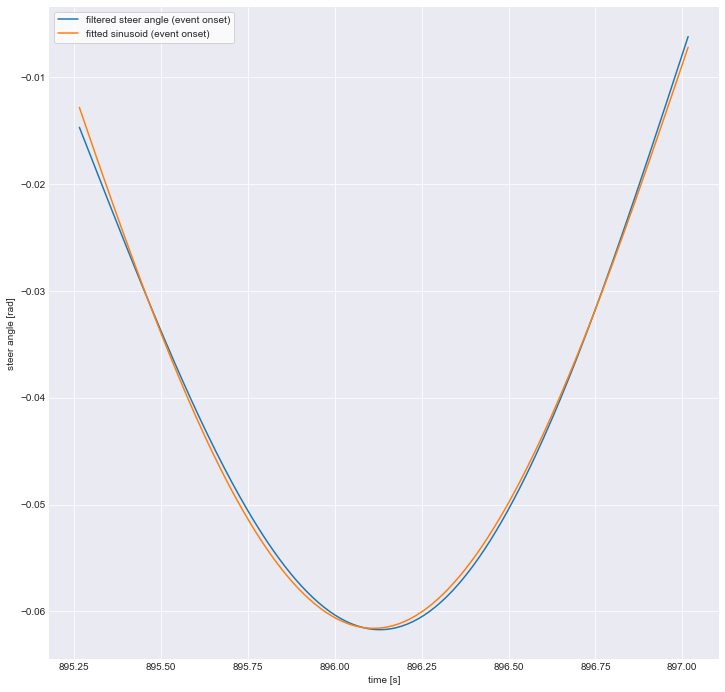

rider 7, trial 12
{'mean': '1.125', 'amplitude': '-1.164', 'frequency': '0.044', 'phase': '-1196.853'}


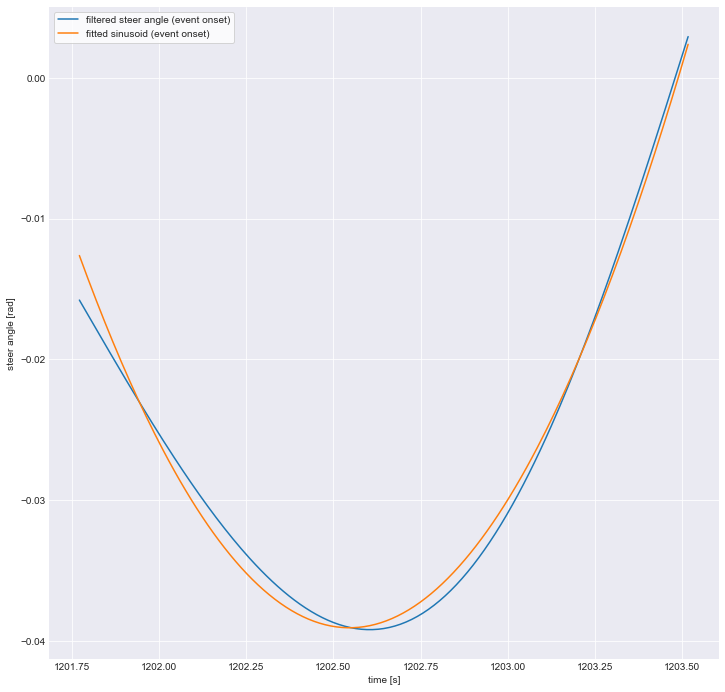

rider 7, trial 13
{'mean': '2.346', 'amplitude': '-2.409', 'frequency': '0.044', 'phase': '-1279.050'}


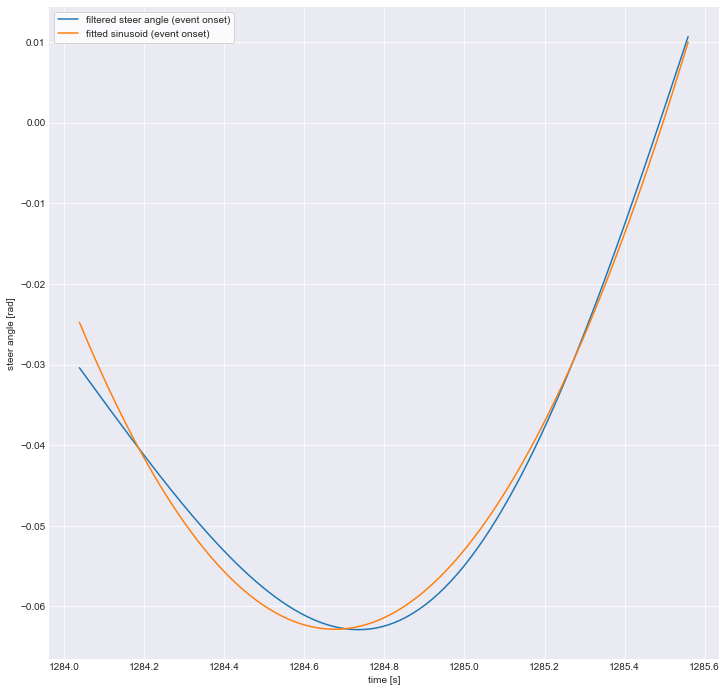

rider 7, trial 14
{'mean': '0.379', 'amplitude': '-0.482', 'frequency': '0.107', 'phase': '-1370.255'}


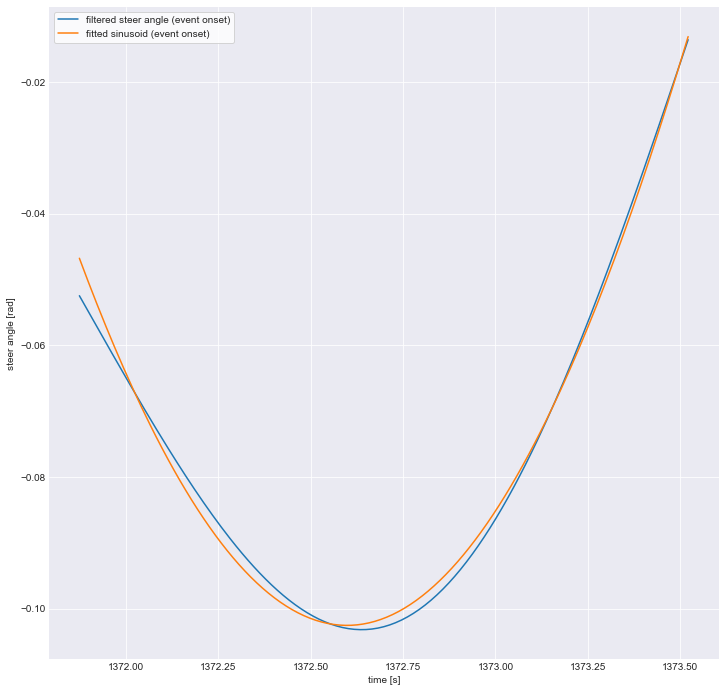

In [65]:
from antlia import trial2

plt.close('all')

sinusoid_fit_amplitude = []
sinusoid_fit_period = []

for i, r in enumerate(records):
    for j, tr in enumerate(r.trials):
        evt = tr.event
        if evt.type.value == trial2.EventType.Overtaking.value:
            fit_params, data = evt._calculate_steer_event_fit() 
            print('rider {}, trial {}'.format(i, j))
            print({k: '{:0.3f}'.format(v) for k, v in fit_params._asdict().items()})
            
            fig, ax = plt.subplots(figsize=(12, 12))
            ax.plot(data[:, 0], data[:, 1], label='filtered steer angle (event onset)')
            ax.plot(data[:, 0], data[:, 2], label='fitted sinusoid (event onset)')
            ax.set_xlabel('time [s]')
            ax.set_ylabel('steer angle [rad]')
            ax.legend()
            plt.show()
            
            sinusoid_fit_amplitude.append(fit_params.amplitude)
            sinusoid_fit_period.append(1/fit_params.frequency)

steer identification for rider 2 trial 9


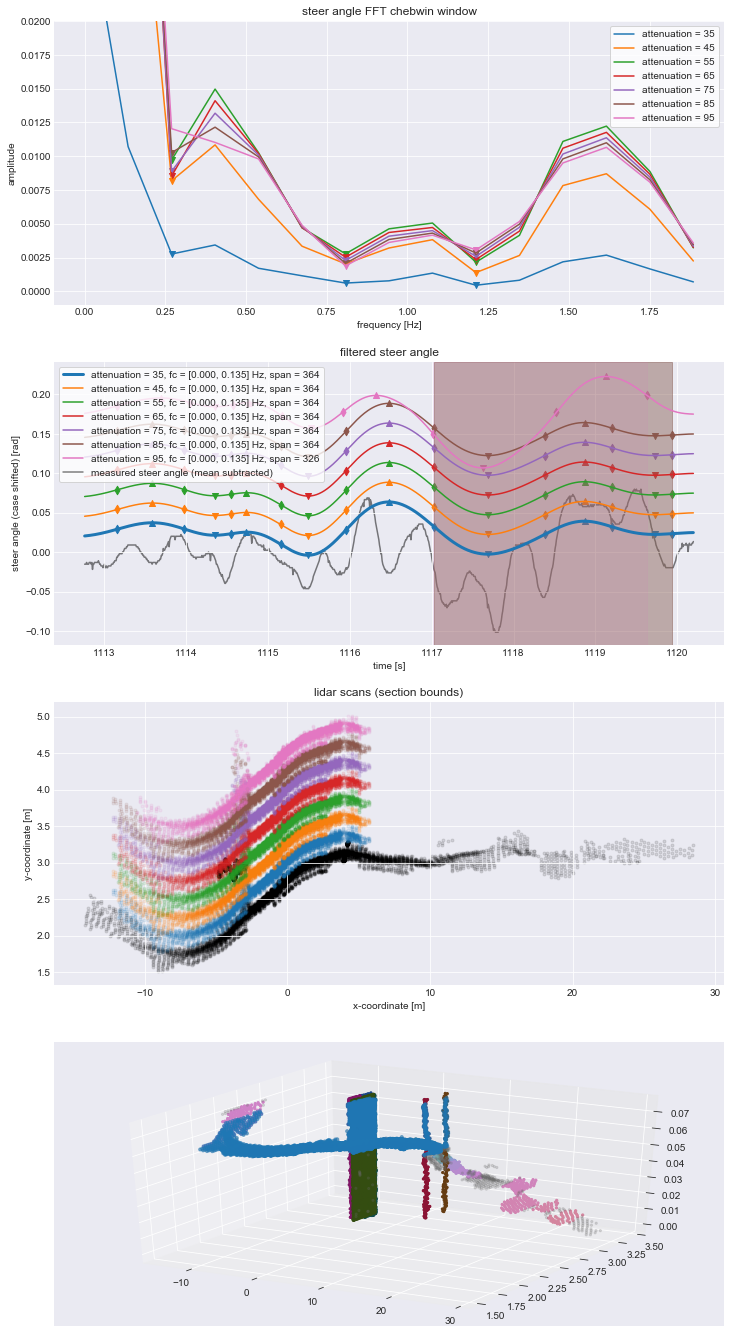

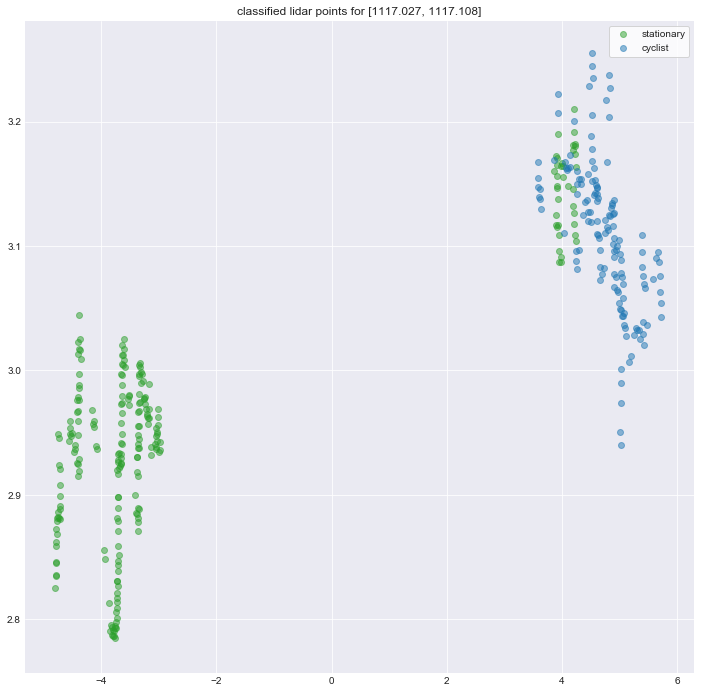

steer identification for rider 3 trial 7


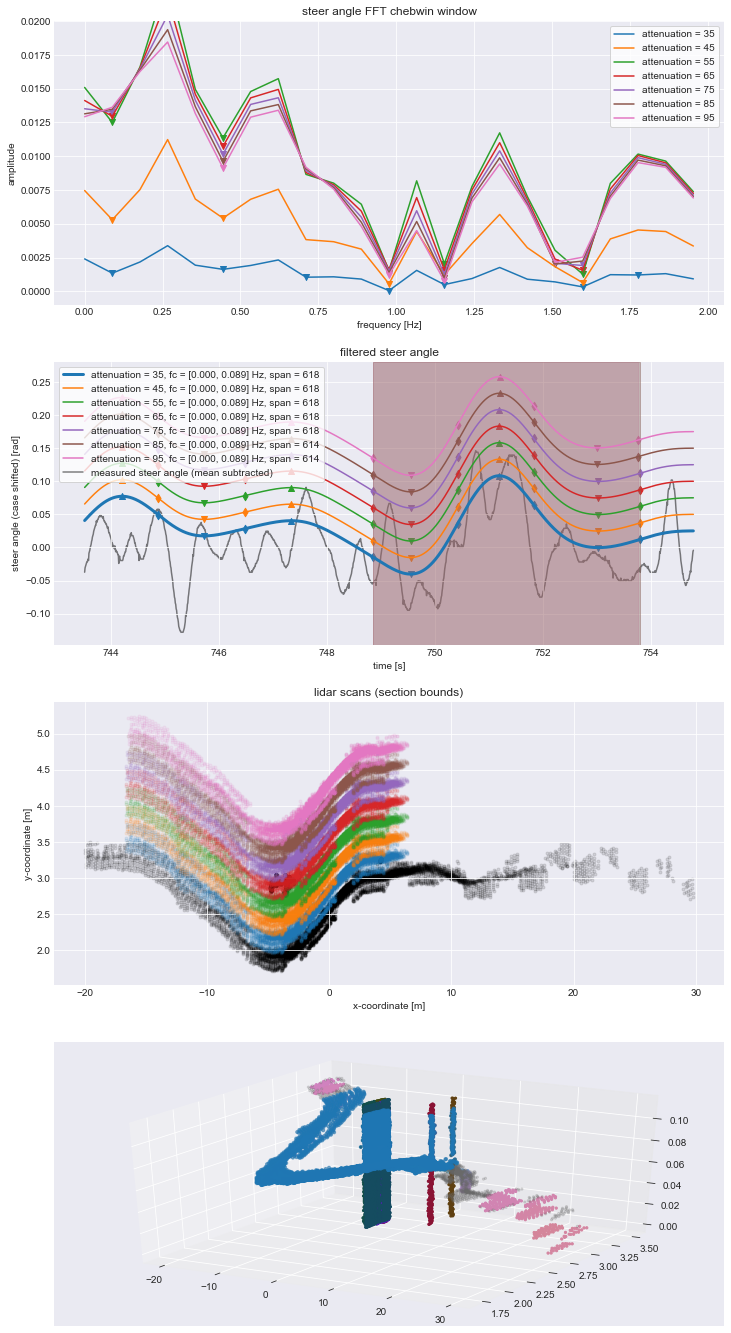

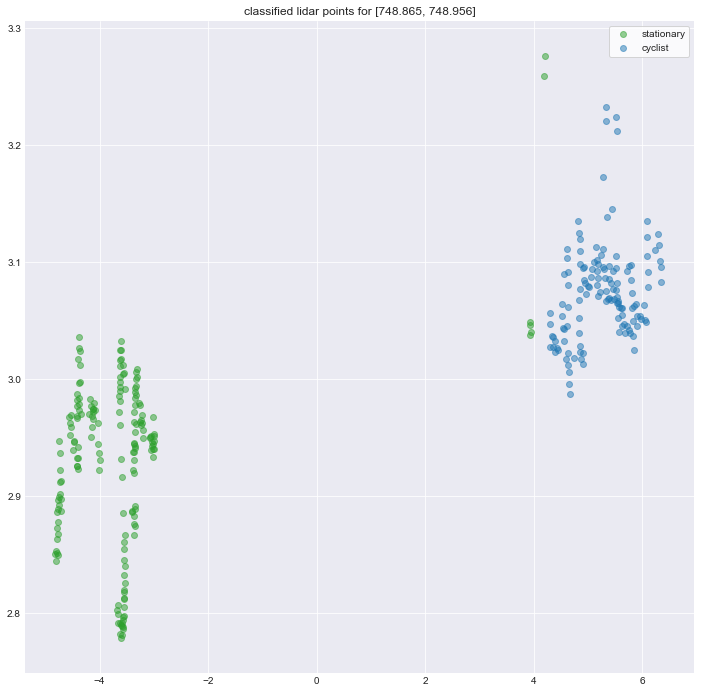

In [5]:
review_set = {
    (2, 9),
    (3, 7)
}
colors = sns.color_palette('tab10', 10)

for i, r in enumerate(records):
    for j, tr in enumerate(r.trials):
        if (i, j) not in review_set:
            continue
            
        print('steer identification for rider {} trial {}'.format(i, j))
        evt = tr.event
        if evt.si is not None:
            evt.plot_steer_identification(figsize=(12, 24))
        
            z0 = evt.z.min()
            z1 = evt.z.max()
            t0 = evt.lidar.time[0]
            t1 = evt.lidar.time[-1]
    
            tstart = evt.bicycle.time[evt.steer_slice][0]
            tstop = evt.lidar.time[evt.lidar.frame_index(tstart) + 1][0]
            zstart, zstop = np.interp([tstart, tstop], [t0, t1], [z0, z1])
            index = (evt.z.data < zstart) | (evt.z.data > zstop)
            
            x = evt.x.copy()
            y = evt.y.copy()
            
            fig, ax = plt.subplots(figsize=(12, 12))
            x.mask = evt.bb_mask | ~evt.stationary_mask | index
            y.mask = evt.bb_mask | ~evt.stationary_mask | index
            ax.scatter(x, y, color=colors[2], alpha=0.5, label='stationary')
            x.mask = evt.bb_mask | evt.stationary_mask | index
            y.mask = evt.bb_mask | evt.stationary_mask | index
            ax.scatter(x, y, color=colors[0], alpha=0.5, label='cyclist')
            ax.legend()
            ax.set_title('classified lidar points for [{:0.3f}, {:0.3f}]'.format(tstart, tstop))
            
            plt.show()

In [41]:
from antlia import filter as ff
import pandas as pd

d = {
    'rider id': [],
    'trial id': [],
    'start index': [],
    'starting velocity': [],
    'distance-to-collision': [],
    'time-to-collision': [],
}

for i, r in enumerate(records):
    for j, tr in enumerate(r.trials):
        evt = tr.event
        if evt.steer_slice is not None:
            t0 = evt.bicycle.time[evt.steer_slice.start]
            dtc = evt.calculate_dtc(t0)
            k = evt.steer_slice.start
            filtered_v = ff.moving_average(evt.bicycle.speed,
                                           window_size=55,
                                           sigma=55/2)
            v0 = filtered_v[k]
            ttc = dtc/v0
            
            d['rider id'].append(i)
            d['trial id'].append(j)
            d['start index'].append(k)
            d['starting velocity'].append(v0)
            d['distance-to-collision'].append(evt.calculate_dtc(t0))
            d['time-to-collision'].append(ttc)
            
            #k = evt.lidar.frame_index(t0)
            #fig, ax = evt._plot_closest_pair(k, figsize=(12, 12))
            #plt.show()
            
df = pd.DataFrame(data=d)
df

distance-to-collision  rider id  start index  starting velocity  \
0               10.470495         0          733           3.827718   
1                4.693497         0          529           6.606079   
2                5.666304         0          675           4.942111   
3                9.369900         0          547           4.978479   
4                7.698607         0          485           6.449297   
5                5.803123         0          920           3.618118   
6                7.120113         0          430           6.254745   
7                8.513010         0          584           4.946657   
8                5.451713         0          910           3.640485   
9                4.923379         1          992           3.499407   
10               8.230498         1          463           6.288696   
11              10.018936         1          579           4.696160   
12               8.217847         1          610           5.035297   
13              14.627875         1          350           6.235137   
14               8.367898         1          857           3.330964   
15              16.523752         1          293           6.231751   
16               6.429295         1          674           4.904991   
17               9.926713         1          818           3.526613   
18               6.612842         2          652           5.210157   
19               8.639403         2          490           6.123444   
20               4.259342         2          993           3.302854   
21               7.061175         2          533           6.134140   
22               7.259690         2          649           4.802674   
23               3.396909         2         1066           3.374572   
24               4.699540         2          963           3.372460   
25              10.635650         2          442           5.453846   
26               4.170169         2          761           3.861723   
27               5.675970         3          760           4.364720   
28               7.998445         3          484           5.827653   
29               5.637524         3         1026           3.621517   
..                    ...       ...          ...                ...   
43              12.492978         4          390           6.234300   
44               6.055039         4          950           3.625289   
45              15.309588         5          301           6.465583   
46               6.647188         5          572           5.404062   
47               9.241799         5          779           3.647788   
48               5.490790         5          886           3.929128   
49              19.590248         5          238           6.410942   
50              11.285148         5          493           5.279811   
51               6.308365         5          671           4.859384   
52              12.043312         5          422           5.922758   
53               7.934074         5          807           3.825294   
54               6.410368         5          986           3.572106   
55               6.816590         6          938           3.383088   
56              11.093241         6          438           6.163024   
57              10.559761         6          564           4.771135   
58               8.731821         6          598           5.094579   
59              10.934785         6          430           6.303125   
60              14.696490         6          617           3.598002   
61              13.700030         6          376           6.221185   
62              13.574303         6          510           4.706502   
63              12.794705         6          559           3.447894   
64               4.558968         7         1061           3.288578   
65               5.498303         7          589           5.727892   
66              10.372106         7          582           4.686556   
67               6.685388   

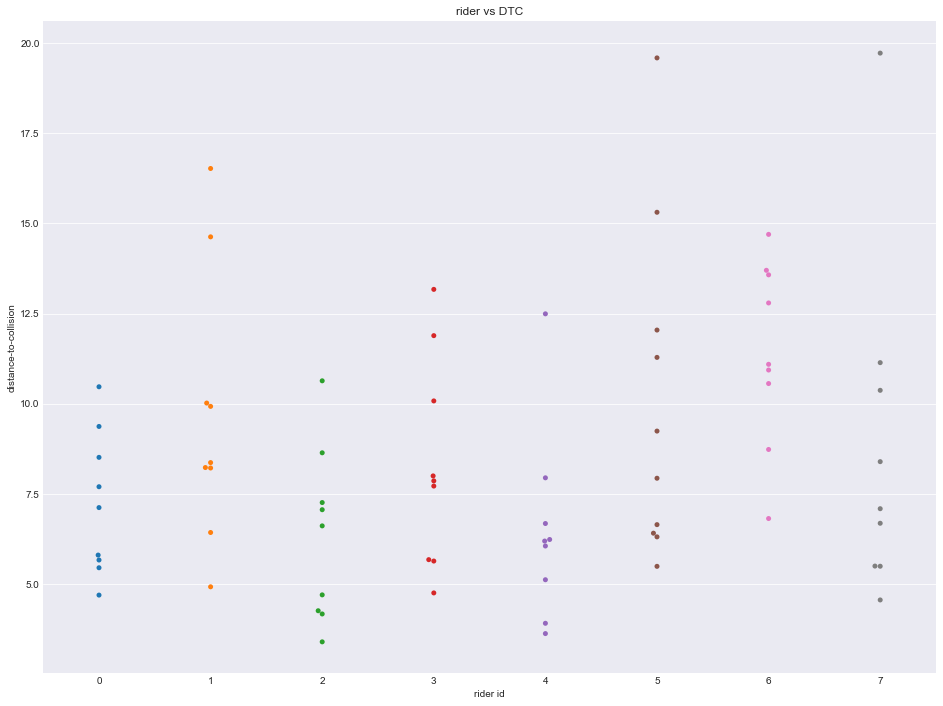

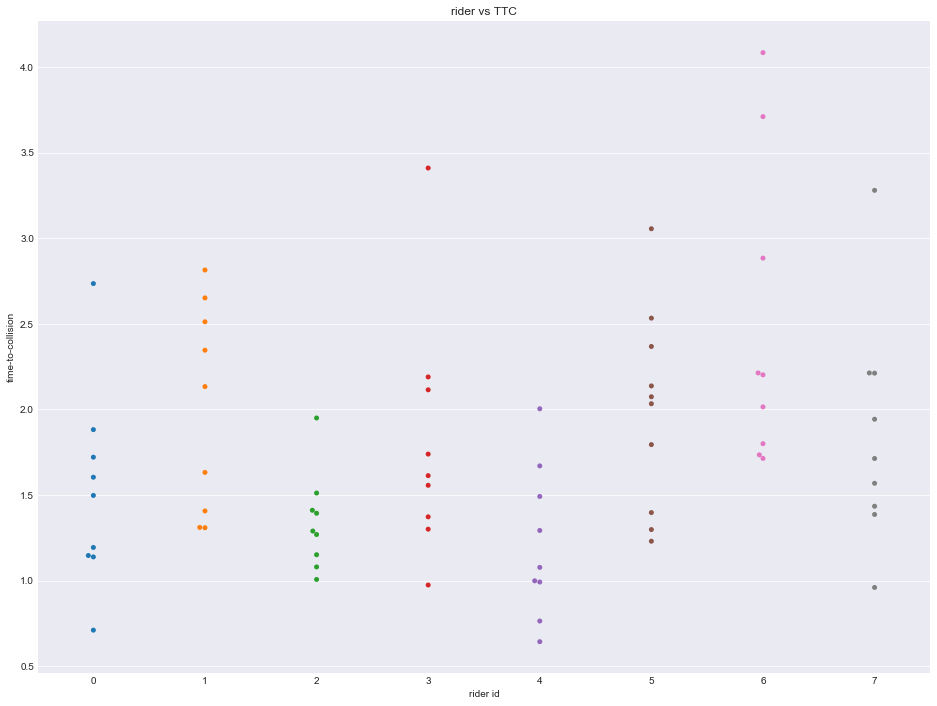

In [42]:
plt.close('all')

fig, ax = plt.subplots(figsize=(16, 12))
sns.swarmplot(x='rider id', y='distance-to-collision', data=df, ax=ax)
ax.set_title('rider vs DTC')

fig, ax = plt.subplots(figsize=(16, 12))
sns.swarmplot(x='rider id', y='time-to-collision', data=df, ax=ax)
ax.set_title('rider vs TTC')

plt.show()

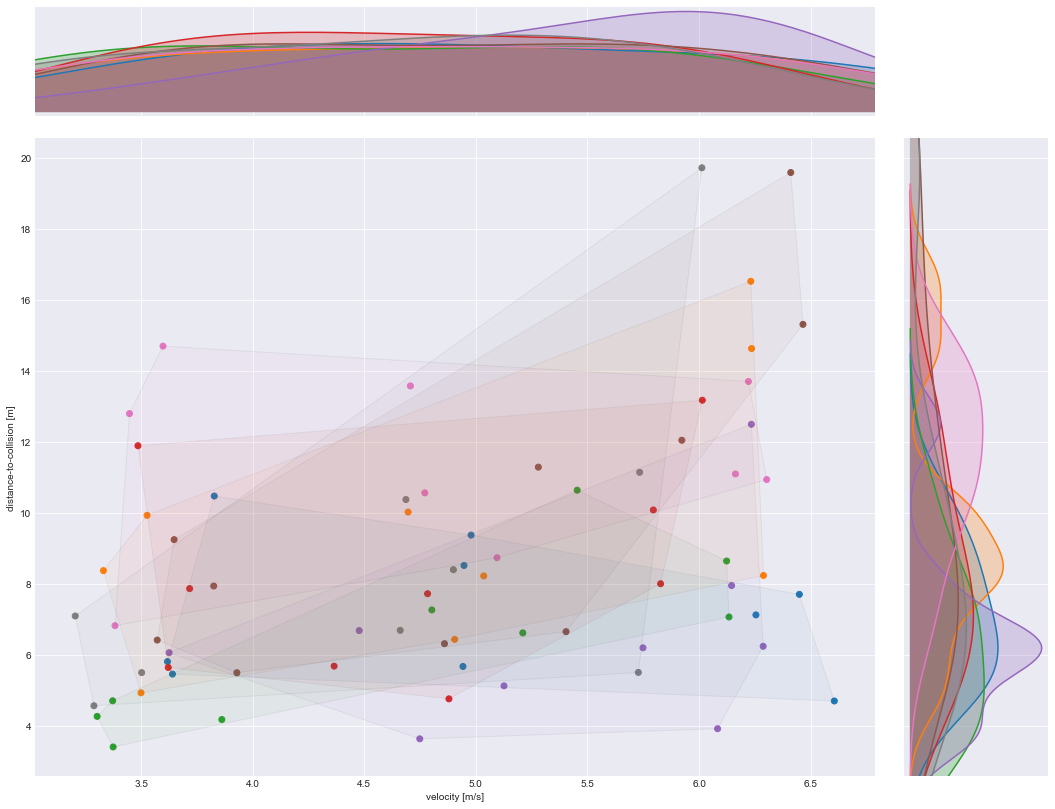

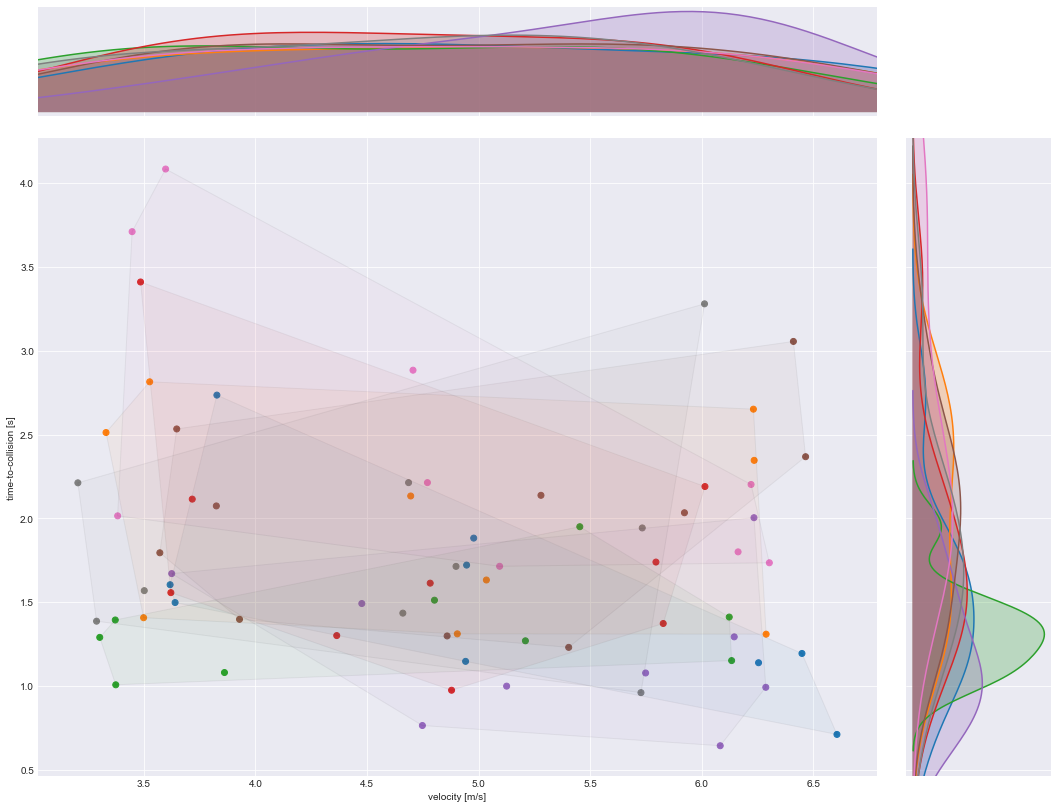

In [44]:
from antlia.plotdf import plotjoint

colors = sns.color_palette('tab10', 10)

plt.close('all')
g = plotjoint('starting velocity', 'distance-to-collision', df,
              kde_key=('rider id', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'distance-to-collision [m]')

g = plotjoint('starting velocity', 'time-to-collision', df,
              kde_key=('rider id', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g.set_axis_labels('velocity [m/s]', 'time-to-collision [s]')
plt.show()

In [45]:
df.to_pickle('trial2_steering_ttc.p.gz')